In [8]:
import collections

# NOTES

### general notes
1. problems denoted by * proved to be quite challenging for me upon first attempt
2. problems denoted by ** are exceedingly challenging and will require a lot of revision
3. problems denoted by @ remain incomplete
4. in leetcode, problems with notes in green are first attempts/solutions or reworks after failure. those with notes in blue are review

### study notes
0. start finding ways/hints on recognizing when a concept will come in handy for a problem (usually for problems that involves the use of multiple concepts) 
1. review Arrays & Hashing and complete all problems for this section - DONE
2. review Two Pointers and complete all problems for this section - DONE
3. review Binary Search and complete all problems for this section - DONE
4. review Stack and complete all problems for this section - DONE
5. review Sliding Window and compete all problems for this section - DONE
6. review Linked List and complete all problems for this section - IN PROGRESS - at problem 19

# 1. Arrays & Hashing

note: arrays and hashing problems usually involve problems that require a certain count of something or if something already exists (count of uniqueness)... but double check on that

### 217. Contains Duplicate (easy)

Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

In [1]:
# attempt
class Solution:
    def containsDuplicate(self, nums: list) -> bool:

        convert = set(nums)
        
        if len(convert) == len(nums):
            return False
        return True
        
# status = success

In [11]:
# solution
class Solution:
    def containsDuplicate(self, nums: list) -> bool:
        hashset = set()

        for n in nums:
            if n in hashset:
                return True
            hashset.add(n)
        return False

#### explanation

my own:
initiate an empty hashset. then start iterating through the nums list. if the number in the current iteration exists in the hashset, this indicates that it is a duplicate and therefore you can return true (NOTE: since the hashset will be empty initially, this condition will never be met in the first iteration). if it isn't in the hashset, proceed to add the number to it. if the loop goes to completion without ever triggering the if block, that means there were no duplicate and you can return false 

### 242. Valid Anagram (easy)

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

In [15]:
# attempt
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:

        s, t = sorted(s), sorted(t)

        if s == t:
            return True
        return False
# status = success
# NOTE: decent time complexity but not good space complexity

In [13]:
# rework
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False

        s, t = sorted(s), sorted(t)

        if s == t:
            return True
        return False
# status = success & improved
# NOTE: better time complexity, but bad space complexity

In [14]:
# rework 2
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False

        return sorted(s) == sorted(t)
# status = success
# NOTE: still bad space complexity

In [12]:
# solution
# big O for this solution
# time complexity: O(n) or O(s + t)
# space complexity: O(n) or O(s + t)

class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False

        countS, countT = {}, {}

        for i in range(len(s)):
            countS[s[i]] = 1 + countS.get(s[i], 0)
            countT[t[i]] = 1 + countT.get(t[i], 0)
        return countS == countT

In [14]:
one = {
    'a' : 3,
    'b' : 4,
    'c' : 1
}

two = {
    'c' : 1,
    'b': 4,
    'a': 3
}

# NOTE: key order doesn't matter for hashmaps
one == two

True

#### explanation

my own:
first check if s is not the same length as t and if that's the case just return false. s and t cannot be anagrams if they have a different amount of letters. then initiate two empty dictionaries. iterate through the length of s. first add a key to the countS dict that is the letter for the index of the current iteration (countS[s[i]]). Then make it equal to 1 + the current occurence count of that letter, if there is one (hence the .get(s[i], 0)). Do the same for countT. Running out of index bounds is not a problem because the first if condition in the beginning ensures they are the same length. Then simply return the bool of countS == countT. if they have the same count of each letter, it will return True and they are anagrams. otherwise they are not anagrams and will return False

#### concept:
so far, I've only tried to use "clever" solutions and built in functions to get the answer. The concept here appears to be arrays or dictionaries (which seem to represent hashmaps in this this conext) and leveraging them

### 1. Two Sum (easy)

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

In [12]:
# attempt
class Solution:
    def twoSum(self, nums: list, target: int) -> list:
        
        hashmap = {}

        for index, value in enumerate(nums):
            if value in hashmap.keys():
                return [index, hashmap[value]]
            else:
                hashmap[target - value] = index

# status = success
# NOTE: although this answer is very good, it was a bit cheating. I had seen it before and simply had to remember the concept

In [13]:
# solution
# big O for this solution
# time complexity: O(n) 
# space complexity: O(n)
class Solution:
    def twoSum(self, nums: list, target: int) -> list:
        prevMap = {}  # val -> index

        for i, n in enumerate(nums):
            diff = target - n
            if diff in prevMap:
                return [prevMap[diff], i]
            prevMap[n] = i
# NOTE: better space complexity for neetcode solution, with still very good time complexity

#### explanation

my own:
begin by creating an empty dictionary (prevMap) where the keys will be the integer and the values will be the index when iterating through nums. Then start iterating through the index and values of nums using enumerate(). calculate the difference between the target and the value of the current iteration. if the difference exists in the dictionary's key, return prevMap[diff] (which will be the index of the difference) and the current index in a list. Otherwise, add to the dictionary the current integer as the key and the index as the value   

### 49. Group Anagrams (medium)

Given an array of strings strs, group the anagrams together. You can return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

In [1]:
# attempt
class Solution:
    def groupAnagrams(self, strs: list) -> list:

        words = {}

        for s in strs:
            # NOTE: you do not want to use s.sort() because you will still need the original s later. sorted() use more memory but it is necessary
            sor = ''.join(sorted(s)) # this one line of code I had to look up and copy paste. didn't know how to effectively sort a string and keep it str, since sorted(s) created a list
            if sor in words:
                words[sor].append(s)
            else:
                words[sor] = [s]

        groups = []
        
        for values in words.values():
            groups.append(values)

        return groups
    
# status = success
# NOTE: really good time and space complexity, but still reliant on built in functions/methods (sorted() & .join()) 
# NOTE: this solution would be good if i could create my own sort algorithm

In [45]:
dic1 = {
    'a' : [1,2,3],
    'b' : [4,5,6]
}

print(dic1.values())

dict_values([[1, 2, 3], [4, 5, 6]])


In [14]:
# reworked attempt
class Solution:
    def groupAnagrams(self, strs: list) -> list:

        words = {}

        for s in strs:
            sor = ''.join(sorted(s))
            if sor in words:
                words[sor].append(s)
            else:
                words[sor] = [s]

        return words.values()

In [15]:
# understanding: sor = ''.join(sorted(s))
# join takes a single parameter, which has to be an iterable

# join all items in a tuple into a string, using a hash character as separator
myTuple = ("John", "Peter", "Vicky")

x = "#".join(myTuple)

print(x)

John#Peter#Vicky


In [11]:
# join all items in a list into a string, using an empty character as separator (essentially fusing the list together into a string)
myList = ['h','e','l','l','o']

s = ''.join(myList)

print(s)

hello


In [51]:
# solution
class Solution:
    def groupAnagrams(self, strs: list) -> list:
        ans = collections.defaultdict(list) # is essentially a dictionary. defaultdict where the default value is a list is used to deal with the edge case where a count might not exist

        for s in strs:
            count = [0] * 26
            for c in s:
                # you find the index of the current letter using [ord(c) - ord('a')], add +1 to it's count 
                count[ord(c) - ord("a")] += 1
            # the reason why we need to make the key a tuple is because dictionary cannot have lists as keys (because lists are mutable)
            ans[tuple(count)].append(s)
        return ans.values()
    
# NOTE: has worse time and space complexitiy, but doesn't make use of sorted() or .join(). it uses ASCII values instead

In [24]:
import collections
ans = collections.defaultdict(list)
print(ans)

defaultdict(<class 'list'>, {})


In [38]:
# I believe this is bucket sort. however bucket sort in this case needs some meaningful way of linking the index to the value, here using ASCII integer representation
# the bucket is also bounded (and therefore the input bounded as well?) because we know that there are only 26 letters in the English alphabet, and all letters are lower case
# index 0 respresents a, and it's value the count of occurence
count = [0] * 26 # a ... z
print(len(count))
print(count)

26
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


ord() simply returns the numerical representation of an ASCII character. following link shows a useful chart

https://www.ascii-code.com/

In [36]:
print(ord('a'))

97


In [31]:
print(ord('a') - ord('a')) 

0


#### explanation

note: to understand this, need first to understand ord() which involves ASCII value

my own: begin my initiating a hashmap that is a default dict, with list as its keys default value (avoids the case where a key doesn't exist and you want to append to a list). Next iterate through each string in strs. start a count which will contain 26 0s, each index representing a letter, and the value its count (example: looking at the beginning of count [1,2,0,0...]. this implies there are 1 a, 2 b, 0 c, 0 d, etc.). Then iterate through the characters in the string. The following line of code is the most confusing

    count[ord(c) - ord('a')] += 1
    
here is the main logic: ord('a') is the numerical representating of a (which happens to be 97). since a is the first letter in the alphabet, it will always be the lowest number between ord(c) and ord('a') unless c == 'a', in which case the result will just be 0, the correct index for a (which is why you do ord(c) - ord('a') and not the other way around). With that operation, you can find the index of the current letter of the iteration, and add +1 to its count

once that is done, count will essentially represent the occurence of each character for the current string. you look for this count in your hashmap ans[tuple(count)] (once again, must be a tuple because dictionary cannot have lists as its keys) and you append the current string to the list that is contained within this key (this is where defaultdict(list) comes in handy, because if you encounter the count for the first time, the list will need to be created. otherwise append will break your code)

finally, simply return the values of your hashmap (ans.values())

### 347. Top K Frequent Elements (medium)

Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

In [7]:
# attempt
# big O for this attempt
# time complexity: O(n+m) -> O(n) I think, not 100% sure. This should be better than O(n log n), which is what the question asks for
# space complexity: also O(n) I think, not 100% sure either
class Solution:
    def topKFrequent(self, nums: list, k: int) -> list:
        # step 1: get hashmap of every element and their count
        hashmap = {}

        for n in nums:
            if n in hashmap:
                hashmap[n] += 1
            else:
                hashmap[n] = 1

        # step 2: find k frequent
        sor = sorted(list(hashmap.values()), reverse=True)
        kFrequent = sor[:k]

        # step 3: return result
        result = []

        for number, count in hashmap.items():
            if count in kFrequent:
                result.append(number)

        return result

# status = success
# NOTE: decent enough time complexity, good space complexity. wasted a lot of time working on a solution that didn't make sense initially because I didn't fully understand what the problem was asking
# NOTE: this answer most likely also wouldn't be accepted without the constraints (my assumption is that the constraints are what makes this problem a medium level problem)
# NOTE: once again reliant on sorted(). starting to feel like a real crutch

In [6]:
# solution
class Solution:
    def topKFrequent(self, nums: list, k: int) -> list:
        count = {}
        freq = [[] for i in range(len(nums) + 1)] # bucket sort but optimized? I understand the intuition behind this line but not the actual code. see explanation

        for n in nums:
            count[n] = 1 + count.get(n, 0)
        for n, c in count.items():
            freq[c].append(n)

        res = []
        for i in range(len(freq) - 1, 0, -1): # what in the tarnation??
            for n in freq[i]:
                res.append(n)
                if len(res) == k:
                    return res

        # O(n)


#### explanation

my own: start by initating an empty hashmap. then the next line of code is crucial and is a clever trick to solve this problem leveraging bucket sort (note: need to understand bucket sort to understand this):

    freq = [[] for i in range(len(nums) + 1)]
    
here is the logic: each index (the value of the index will be a list) will represent the number of occurence of a certain number. The reason for range(len(nums + 1)) is because the maximum occurence for a given number in nums is len(nums) (the entire array is filled with the same number) and so your bucket is bounded by the length of the input array. +1 is added because index 0 doesn't matter but must be included for indexing reasons later on. We don't care about numbers that never occur in this problem. This freq list (which will be a list of lists) will be useful later on. Working your way backwards through it (from end to beginning) will allow you to see the list of numbers that occur most frequently first. It is important to add empty arrays for appending numbers into it later on.

 
next is:

        for n in nums:
            count[n] = 1 + count.get(n, 0)
        for n, c in count.items():
            freq[c].append(n)
            
the first loop simply creates the hashmap. each key will be a number, and the value for the key the count of occurence. the next loop is where our bucket comes in handy. start iterating through the keys (numbers) and values (occurence) of your hashmap, then append at index c (c is the the count in the hashmap, and index is occurence in the bucket) to the list in the bucket there the current number, n. 


now all that is left is iterating through your freq list backwards and looking at the lists in the bucket.

        res = []
        for i in range(len(freq) - 1, 0, -1):
            for n in freq[i]:
                res.append(n)
                if len(res) == k:
                    return res

initiate an empty list, res. start iterating through freq with this in mind: you want to start at the end of freq (len(freq - 1) -> the minus 1 to keep in mind indexing), end at 0 (the first index of freq) and work your way backwards one step at a time (-1). then for the numbers n in freq at index i (i representing occurence), append to your res list the number. immidiately check after if the length of your res list is == k, and if it is, return the answer. otherwise keep going. brilliant solution

### 238. Product of Array Except Self (medium)*

Given an integer array nums, return an array answer such that answer[i] is equal to the product of all the elements of nums except nums[i].

The product of any prefix or suffix of nums is guaranteed to fit in a 32-bit integer.

You must write an algorithm that runs in O(n) time and without using the division operation.

In [14]:
# attempt 
class Solution:
    def productExceptSelf(self, nums: list) -> list:

        # the key is the index of the number in nums, and the value is that number's index
        hashmap = {}
        length = len(nums)-1

        for index, value in enumerate(nums):
            hashmap[index] = value

        # created bounded bucket, where index will present number value and value represent sum
        buck = [0 for i in range(length)]

        result = []

        counter = 0
        for key, value in hashmap.items():
            if counter != key:
                buck[key] += value
            counter += 1
            
            # what now? can't have nested loops. need to stay at O(n)

In [25]:
# attempt 2
class Solution:
    def productExceptSelf(self, nums: list) -> list:

        product = 1
        for num in nums:
            product = product * num

        # get a new array that is the length of the input array
        # each element is the product of every element in the array
        prod = [product for i in range(len(nums)-1)]

        # what to do now? can't use division
    
# status = failure
# NOTE: also initially read the question wrong and worked on a solution that didn't address the problem (product, not sum). UNDERSTAND THE QUESTION
# NOTE: was taking far too long to figure this out. need to recognize when I have the tools & need to think vs i don't have what I need

In [38]:
# solution
class Solution:
    def productExceptSelf(self, nums: list) -> list:
        # an array filled with 1s, the length of the input array
        res = [1] * (len(nums))

        # unsure what rest of the code does
        for i in range(1, len(nums)):
            res[i] = res[i-1] * nums[i-1]
        postfix = 1
        for i in range(len(nums) - 1, -1, -1):
            res[i] *= postfix
            postfix *= nums[i]
        return res
# NOTE: this has an O(1) space complexity if you don't count the result array

In [26]:
# code breakdown
nums = [1,2,3,4]

res = [1] * (len(nums))
print(res)

print('~'*40)

for i in range(1, len(nums)):
    res[i] = res[i-1] * nums[i-1]
print(res)

print('~'*40)

postfix = 1
for i in range(len(nums) -1, -1, -1):
    res[i] *= postfix
    postfix *= nums[i]
print(res)

[1, 1, 1, 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[1, 1, 2, 6]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[24, 12, 8, 6]


In [28]:
answer = [24,12,8,6]

In [27]:
# solution 2. this is the solution written in the video and is a lot easier to understand and even appears better
class Solution:
    def productExceptSelf(self, nums: list) -> list:
        res = [1] * (len(nums))

        prefix = 1
        for i in range(len(nums)):
            res[i] = prefix
            prefix *= nums[i]
        postfix = 1
        for i in range(len(nums) - 1, -1, -1):
            res[i] *= postfix
            postfix *= nums[i]
        return res

#### explanation

my own: this solution uses a single array res (which will be the output array and does not count towards space complexity if we consider the context of this problem) and works with some very clever logic to calculate the output. Almost too clever, it would probably be better to go with the prefix/postfix start approach for simplicity during an interview. also according to antoine, the prefix/postfix approach is applicable in other problems

start off by creating an array, res, that is length of your input array nums, and fill it with 1s.

then initiate the prefix variable to 1 and start iterating through the input array using range. the value at index i for the res array is replaced by the current prefix, then you calculate the next prefix by multiplying the current prefix by the value of the current index in the nums array. this essentially "creates" the prefix array as done in the prefix/postfix approach seen in the rework below

once done with the prefix section, work on the postfix section by initiating a postfix variable to 1. also iterate through the nums array using range, this time starting at the end (len(nums)-1), stopping at the beginning (unsure why it's -1) and stepping backwards (-1). by starting at the end and stepping backwards, the prefix currently in the res array will be multiplied by the corresponding postfix, removing the need to have multiple arrays to calculate the result

In [16]:
# rework with prefix / postfix approach
# time complexity: O(n)
# space complexity: O(n)
class Solution:
    def productExceptSelf(self, list) -> list:
        
        result = []

        prefix = []
        postfix = []

        # calculate the product of prefixes for every index
        pre = 1
        for i in range(len(nums)):
            prefix.append(pre)
            pre *= nums[i]

        # calculate the product of postfixes for every index
        po = 1
        for i in reversed(range(len(nums))):
            postfix.append(po)
            po *= nums[i]
            
        # the reason for iterating through the postfix array backwards is because the postfix array is created forward. it would look like [1,4,12,24] if we go with the example explained below
        for n1, n2 in zip(prefix, postfix[::-1]):
            result.append(n1 * n2)

        return result
# status = success
# NOTE: struggled hard to do this correctly even with the intuition in mind...
# NOTE: code might be more complicated than necessary

#### explanation 

the idea behind this approach is to have 2 arrays - one with the cumulative product of all numbers before the current index (prefix), and the other the cumulative product of all numbers after the current index (postfix). once we have all the prefixes and postfixes, we can multiply them by each other to get the answer. to explain with an example, if we have the following input and its corresponding answer:

       [1,2,3,4] -> [24,12,8,6]
       
the prefix array would look like the first array, and the postfix array would look like the second array:

        [1,1,2,6] [24,12,4,1]
        
as we can see - index 0: 1x24 -> 24. index 1: 1x12 ->. index 2: 2x4 = 8. index 3: 6x1: 6. 

it's helpful to imagine the array in the following manner when calculating the prefix for index[0] and the posfix for index[-1]

        1[1,2,3,4]1

so for example, at index 0 the cumulative product before this index is just 1 since there is nothing prior, and the cumulative product after that index is 24 (2x3x4). so when we multiply them we get the product of array minus self at that index 1x24=24. same for index 2: the cumulative product before the number 3 in the input array is 2 (1x2), and the cumulative product after this same number 3 is just 4. 2x4 = 8 which is correct
 

### 36. Valid Sudoku (medium)*

Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

1. Each row must contain the digits 1-9 without repetition.
2. Each column must contain the digits 1-9 without repetition.
3. Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition.

Note:
* A Sudoku board (partially filled) could be valid but is not necessarily solvable.
* Only the filled cells need to be validated according to the mentioned rules.

In [3]:
# attempt
class Solution:
    def isValidSudoku(self, board: list) -> bool:
        
        # will be used to validate column
        sudoku = [[]] * 9

        for rows in board:
            # will be used to validate row
            temp = []
            for n in range(len(rows)):
                # this validates rows
                if rows[n].isalnum() and rows[n] in temp:
                    return False
                temp.append(rows[n])
                # this validates columns
                if rows[n].isalnum() and rows[n] in sudoku[n]:
                    return False
                sudoku[n].append(rows[n])
                # need to validate sub-box
        return True
    
# status = failure
# NOTE: for some reason even this fails to validate rows & columns properly... didn't even get to the sub-box

In [5]:
# solution
class Solution:
    def isValidSudoku(self, board: list) -> bool:
        cols = collections.defaultdict(set)
        rows = collections.defaultdict(set)
        squares = collections.defaultdict(set)  # key = (r /3, c /3)

        for r in range(9):
            for c in range(9):
                if board[r][c] == ".":
                    continue
                if (
                    board[r][c] in rows[r]
                    or board[r][c] in cols[c]
                    or board[r][c] in squares[(r // 3, c // 3)]
                ):
                    return False
                cols[c].add(board[r][c])
                rows[r].add(board[r][c])
                squares[(r // 3, c // 3)].add(board[r][c])

        return True

#### explanation

my own: this one is fairly straightforward, although i couldn't solve it in a timely manner.

there's 3 things to check: rows, columns, and the 3x3 squares. begin by creating 3 hashmaps that default to a set if the key doesn't exist using  

    collections.defaultdict(set)
    
then begin iterating through the rows using range(9), immeditately following by iterating through the columns also using range(9). using the variables created in the loops you can now easily index the board. if the current row/column value is empty aka is ".", move on to the next iteration. otherwise, check if the value exists in the current row (using index r), or if it exists in the current column (using index c), or if it exists within the square (this is the trickiest part and will be explained in a code cell below, but makes a clever use of the modulus operator knowing we have 9 rows and cols and that each square is 3x3). if any of them are true it is not a valid sudoku and you must return False

if the False block is not triggered add the current value where it belongs in the cols, rows, squares hashmap using the appropriate index

if the outer loop runs to completion without ever triggering the False block, you have a valid (but not necessarily solvable) sudoku and can therefore return True

In [18]:
# simple example for the column
cols = collections.defaultdict(set)

# second column
c2 = 2
# third column
c3 = 3

cols[c2].add(3)
cols[c3].add(5)
print(cols)

# now how the square works. a visualization is shown below
# let's say we are in first column (0) and the second row [1]
r, c = 0, 1
square = (r // 3, c // 3)
# as we can see, we're in the first square in the sudoku, the top left one
print(square)
r, c = 0, 7
square = (r // 3, c // 3)
# here we are in the third square in the sudoku, the top right one
print(square)

defaultdict(<class 'set'>, {2: {3}, 3: {5}})
(0, 0)
(0, 2)


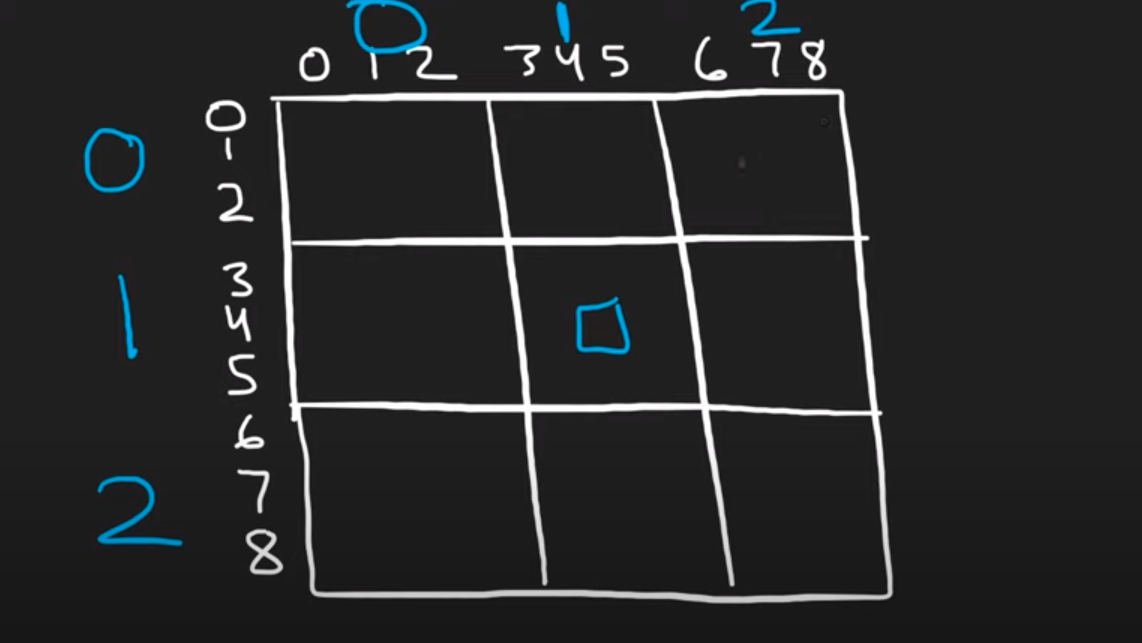

### 271. Encode and Decode Strings (medium)*

Design an algorithm to encode a list of strings to a single string. The encoded string is then decoded back to the original list of strings.

In [8]:
# attempt
class Solution:

    def encode(self, strs: list) -> str:
        enc = ''

        for s in strs:
            enc += s + '^'

        enc = enc.rstrip('^')

        return enc

    def decode(self, s: str) -> list:
        lst = []
        s = s.split('^')

        for string in s:
            lst.append(string)

        return lst
    
# status = failure
# NOTE: too simple. was just brute forcing/mashing code and not really trying anything clever
# NOTE: also was just feeling fairly discouraged today and did not really give it my best
# NOTE: this was my first intuition - using some kind of delimiter to seperate the words
# NOTE: second intuition was using a state variable to store the length of the strings, however that was unacceptable; algo had to be stateless
# NOTE: the solution lied in combining my initial two intuitions

In [19]:
# attempt 2
class Solution:

    splitIndex = set()

    def encode(self, strs: list) -> str:
        enc = ''

        indx = 0

        for s in strs:
            indx += len(s)
            splitIndex.add(indx)
            enc += s 

        return enc

    def decode(self, s: str) -> list:
        lst = []

        for i in range(len(splitIndex)):
            if i == 0:
                word = s[:splitIndx[i]]
            elif i == len(splitIndex) - 1:
                word = s[splitIndx[i]:]
            else:
                word = s[splitIndex[i-1]:splitIndex[i]]

            lst.append(word)

        return lst

# status = failure
# NOTE: possible code has some logic/indexing errors but the idea is there
# NOTE: the splitIndex set essentially stored the index at which every word ended

In [16]:
# solution
class Solution:
    def encode(self, strs:list) -> str:
        res = ""
        for s in strs:
            res += str(len(s)) + "#" + s
        return res

    def decode(self, s: str) -> list:
        res = []
        i = 0
        
        while i < len(s):
            j = i
            while s[j] != '#':
                j += 1
            length = int(s[i:j])
            i = j + 1
            j = i + length
            res.append(s[i:j])
            i = j
            
        return res

In [25]:
# solution in video - same logic just a bit more clear in my opinion
class Solution:
    def encode(self, strs:list) -> str:
        res = ""
        for s in strs:
            res += str(len(s)) + "#" + s
        return res
    
    def decode(self, s: str) -> list:
        res, i = [], 0
        
        while i < len(s):
            j = i
            while s[j] != '#':
                j += 1
            # example: if the first word is incredibilis, the encoded version will look like 12#incredibilis
            # i will be 0, and j will run until it reaches the delimiter: it will be 2 in this example
            # so int(s[0:2]) will be equal to 12, meaning you can use the i and j indexes to find the length of the word
            # then using j and length you can index the whole word: s[3:14] (j + 1 = 3, j + 1 + 12 = 14)
            # remember that the first index is inclusive and the second one isnt. it also isn't an issue if the second index is out of bounds
            # i then is now updated to the index of the end of the current word: this is so next iteration can begin at after the end of this word
            length = int(s[i:j])
            res.append(s[j + 1 : j + 1 + length])
            i = j + 1 + length
        return res

#### exlanation:

my own: this solution involves using a way of storing the length of the strings from the initial list into the actual encoded string while also using a delimiter

the encode method is fairly straightforward. initiate an empty string res, then iterate through the strings in the list. for each string, append to res the length of the string followed by the delimiter '#' followed by the string itself. once complete return the res

the decode method is a bit trickier. initiate an empty list to store your result and an index starting at 0 to keep track of where you are when going through the encoded string. start a while loop that begins at i (initially 0, the beginning of the string) and runs until you reach the end of the encoded string. create a new variable j that will initially be equal to i: this will be use to find the delimiter and access the length of the string. create another while loop that uses the j index on the string which will run until the delimiter '#' is reached. once you've reached the delimiter (should be within 1 or 2 iteration: the reason for the while loop is the length could be 42 -> requires 2 iterations or 1056 -> requires 4 iterations, so you don't know how long until you find the delimiter ahead of time) you can now access the length of the word. store that length using the i index (where you started: slicing is here inclusive) and the j index (where the delimiter is: slicing here is noninclusive). now with the length, you can append the string into your list using the following slicing:

    s[j + 1 : j + 1 + length]
    
j + 1 means one index right of the delimiter, and j + 1 + length will be the entire word

once you've appended the word, update your i index to: j + 1 + length. this will allow the next iteration of the outer while loop to pick up at the end of the last word. once the outer loop is done you will have found every word and can now return your res list

### 128. Longest Consecutive Sequence (medium)

Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.

You must write an algorithm that runs in O(n) time.

In [8]:
# attempt
class Solution:
    def longestConsecutive(self, nums: list) -> int:    
        nums = sorted(nums)

        longest = 0
        sequence = 1

        for i in range(len(nums)):
            if i + 1 < len(nums) and nums[i + 1] == nums[i] + 1:
                sequence += 1
            elif i + 1 < len(nums) and nums[i + 1] == nums[i]:
                continue
            else:
                longest = max(longest, sequence)
                sequence = 1
        return longest

# status = success
# NOTE: good performance (space & time complexity) but feels like cheating. didn't use array & hashing AND used sorted(). also didn't solve in O(n) time

In [11]:
# solution
class Solution:
    def longestConsecutive(self, nums: list) -> int:
        numSet = set(nums)
        longest = 0

        for n in numSet:
            # check if its the start of a sequence
            if (n - 1) not in numSet:
                length = 1
                # using n + length and incrementing length by 1 using length += 1 allows you to move up the sequence gracefully in the while loop
                while (n + length) in numSet:
                    length += 1
                longest = max(length, longest)
        return longest

#### explanation
my own: this solution identifies sequences by looking at if a certain number has a left neighbour or not. begin by creating a set using the input nums list, as duplicate numbers do not count towards a sequence and therefore do not matter, and initiate a variable which will be used to store the length of the longest sequence

then start iterating through the set. check if the current number minus 1 exists in the set: if it does not, that means it is a number that could begin a sequence. initiate a variable that will count the length of this sequence, beginning at one. then using a while loop thats uses the current number + the current length of the sequence, essentially check if the next number in the sequence exists in the set, and continue incrementing until n + length does not exists in the set. when that happens, update the longest variable using max and comaparing the current sequence length to the current longest length. 

once you've iterated through all the numbers in the set, simply return the longest variable

# 2a. Two Pointers

### 125. Valid Palindrome (easy)

A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.

Given a string s, return true if it is a palindrome, or false otherwise.

In [8]:
# attempt
# big O for this attempt
# time complexity: O(n+m) -> O(n) (not 100% because of the built in functions and slicing)
# space complexity: not sure, but it's not good. 
class Solution:
    def isPalindrome(self, s: str) -> bool:

        s_lower = s.lower()
        s_filtered = ''.join(filter(str.isalnum, s_lower))

        forwards = []
        backwards = []

        for c in s_filtered:
            forwards.append(c)
        for c in s_filtered[::-1]:
            backwards.append(c)

        return forwards == backwards
# status = success
# NOTE: good time complexity, bad space complexity
# NOTE: also extremely reliant on built in functions (join & filter)

In [32]:
# attempt 2
class Solution:
    def isPalindrome(self, s: str) -> bool:

        # processing
        s = s.lower()
        s = ''.join(filter(str.isalnum, s))
        
        # comparison
        return s == s[::-1]

# status = success
# NOTE: both better in time and space complexity
# NOTE: downside: slightly less readable

In [34]:
test = 'abc'

# initially wrote it as [-1::-1] but that is not necessary. it is implied you start at the end if using a negative step if no specified beginning. why would you want to go backwards out of index bounds?
for c in test[::-1]:
    print(c)

c
b
a


In [20]:
# look at code behavior for the following line: s_filtered = ''.join(filter(str.isalnum, s_lower))
test = 'This & is *a #$ String'

# this obviously just makes everything lower case
test_lower = test.lower()
print(test_lower)

# filter() takes in 2 arguments: a function, and an iterable. this function returns an iterator (not an iterable?) where the items are filtered through a function to test if the item is accepted or not <- from w3schools
# str.isalnum is our function (actually a method of the str object) which returns true if all the characters are alphanumeric
# so by using filter, and passing the .isalnum method along with our lower cased string, we are left with a string that is all lower cased and contains only alphanumeric numbers
test_filtered = ''.join(filter(str.isalnum, test_lower))
print(test_filtered)

# NOTE: play around with filter() a bit more. only about 75% understand it

this & is *a #$ string
thisisastring


In [3]:
# solution
# big O for this solution
# time complexity: O(n)
# space complexity: O(1)
class Solution:
    def isPalindrome(self, s: str) -> bool:
        l, r = 0, len(s) - 1
        # search begin at the very start and very end of the string. it ends when the pointers meet each other
        while l < r:
            # this goes forward and continues until it finds an alphanumeric character
            while l < r and not self.alphanum(s[l]):
                l += 1
            # this goes backwards and continues until it finds an alphanumeric character
            while l < r and not self.alphanum(s[r]):
                r -= 1
            # this compares the lower cased characters
            if s[l].lower() != s[r].lower():
                # if not the same, it is not a palindrome
                return False
            # increment & drecement to find the next two characters to compare
            l += 1
            r -= 1
        # if loop completes, then it is a palindrome
        return True

    # Could write own alpha-numeric function
    def alphanum(self, c):
        return (
            ord("A") <= ord(c) <= ord("Z")
            or ord("a") <= ord(c) <= ord("z")
            or ord("0") <= ord(c) <= ord("9")
        )

#### explanation

my own: the concept is simple, but the execution not so much (in my opinion). the idea is to iterate through the strings with 2 pointers, one forward and one backwards, and checking equality between the characters. there is an added challenge where we have to delete (or omit) non-alphanumerical characters and so just going forward and backwards and checking equality is not enough. additionally, we need to convert the characters to lower case as well because the problem does not take into account cases.

initiate two variables, l and r. Assign 0 to l, and the length of the input string - 1 to r (minus 1 for indexing purposes).

start an outer loop that runs for the duration that l (initially 0) is smaller than r. the inner loops will be used with the help of the alphanum method to find characters using indexing and ignore non-alphanumeric characters. once both inner loops are done, we know that we found two alphanumeric characters, and now we check if they are the same when lowercased. if not, return false. if they are the same, continue the search and increment l by 1 and decrement r by 1. the search will continue until both pointers meet in the middle of the string. it does not matter if the string has an odd or even length of characters, because if it is uneven the odd character left will belong both to both pointers, and if it is even the loop will end as soon as l is greater than r. this is what the following code achieves. look at notes in cell above for more detail on specific lines

        while l < r:
            while l < r and not self.alphanum(s[l]):
                l += 1
            while l < r and not self.alphanum(s[r]):
                r -= 1
            if s[l].lower() != s[r].lower():
                return False
            l += 1
            r -= 1
        return True
        
there is also the homemade alphanum function (it is actually quite simple, and this concept is apparently applicable in any language). i added some spaces for readability. prerequisite for this is some ASCII knowledge. we know that the ASCII values for A-Z is continuous, same for a-z and 0-9. and so we just need to make sure that our character's ASCII value falls within these ranges

    def alphanum(self, c):
        return (
            ord("A") <= ord(c) <= ord("Z")
            or 
            ord("a") <= ord(c) <= ord("z")
            or
            ord("0") <= ord(c) <= ord("9")
        )

#### note to self: the practice of problem solving happens during the leetcode problem attempt. the learning of concepts/tools happen when watching the video

#### avoid reading code that you don't understand and being stubborn by trying to figure it out. it wastes time and the neetcode guy explains it perfectly well. write your own explanation AFTER the video

### 167. Two Sum II - Input Array is Sorted (medium)

Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be numbers[index1] and numbers[index2] where 1 <= index1 < index2 < numbers.length.

Return the indices of the two numbers, index1 and index2, added by one as an integer array [index1, index2] of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only constant extra space.

In [1]:
# attempt. this works but is too slow
class Solution:
    def twoSum(self, numbers: list, target: int) -> list:
        # problem requires O(1) space complexity -> means two pointers
        # can't use a hashmap due to space restrictions (or can you?)
        # we know there is exactly ONE solution, this simplifies things for us. return the first index pair that works

        l, r = 0, len(numbers) - 1

        # while the index of forward pointer is smaller than index of backwards pointer
        while l < r:
            # compare the first int to the rest of the array
            while l < r:
                result = numbers[l] + numbers[r]
                if result == target:
                    return [l+1,r+1]
                r -= 1
            # if no result, reset the value of r and increment l by 1
            l = len(numbers) - 1
            r += 1
        
# status = failure

In [2]:
# some tests
t = [1,2,3,4]

# this is pointless because the while l < r already takes care of this
for i in range(len(t)//2):
    print(i)
    
print('~'*40)
    
for i in range(len(t)):
    print(i)

0
1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
1
2
3


In [1]:
# attempt 2
# big O for this attempt
# time complexity: like 90% sure its O(n)
# space complexity: has to be O(1) 
class Solution:
    def twoSum(self, numbers: list, target: int) -> list:
        # think about this: SORTED IN ASCENDING ORDER
        
        # initiate the two pointers
        l, r = 0, len(numbers) - 1

        # start the search, with l at the beginning of the array and r at the end
        while l < r:
            # find the difference between the target and the number at index l (the left pointer)
            diff = target - numbers[l]
            # while the difference is smaller than the number at index r, keep decrementing the right pointer (this saves time). taking advantage that the list is sorted
            while diff < numbers[r]:
                r -= 1
            # once the difference is no longer greater than the number at index r, check if they are equal
            # if they are, return the index l+1 and index r+1 (for some reason the question asks for this. maybe i missed something)
            if diff == numbers[r]:
                    return [l+1, r+1]
            # if nothing is found, increment left pointer by 1 and resume search
            l += 1
# status = success
# NOTE: good time complexity (beat 83.84% of users) and good enough space complexity (beat 57.76%)

In [7]:
# solution
class Solution:
    def twoSum(self, numbers: list, target: int) -> list:
        l, r = 0, len(numbers) - 1

        while l < r:
            curSum = numbers[l] + numbers[r]

            if curSum > target:
                r -= 1
            elif curSum < target:
                l += 1
            else:
                return [l + 1, r + 1]

#### explanation

my own: this problem is the opposite of the previous one in terms of complexity. the execution is quite simple, but the concept requires some thought. the intuition here is to sum the number at the left pointer and the number at the right pointer, taking advantage that the list is sorted in ascending order and that there is exactly one solution. if the sum is greater than the target, decrement the right pointer. else if the sum is smaller than the target, increment the left pointer. otherwise, that means that the sum is equal to the target and you found your numbers. the current value for l (the left pointer) and for r (the right pointer) will be the indices you want, +1 added to each for whatever reason. that's what the problem asks for

### 15. 3Sum (medium)*

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

In [38]:
# attempt. I seem to have an idea that would work but an infinite loop appears to be created with this code and therefore doesn't work. there is faulty logic
# my idea was essentially to have 3 pointers (current, l, and r) and sort the initial list and use similar logic as Two Sum II to find the triplets that add up to 0
class Solution:
    def threeSum(self, nums: list) -> list:
        # input is simple: list of integers
        # output is a list of lists, with these inner lists containing integers
        # output must not contain duplicate triplets

        # hint: since this is in the 2 pointers section of neetcode, will need at least 2 pointers concept. maybe more?

        # unsure how to create the output for now
        output = []

        # NOTE: what if i sort the list first? is that necessary and/or helpful? could save time
        nums.sort(reverse=True)

        for i in range(len(nums)-1):
            current = nums[i]

            # you want your left pointer to be 1 index to the right of the current number 
            l, r = i+1, len(nums)-1

            # base logic in the best case scenario (for example, nums = [0,0,0])
            while l < r:
                # if nums is sorted (in our case descending order), can save some time
                numSum = current + nums[l] + nums[r]
                if numSum > 0:
                    l += 1
                elif numSum < 0:
                    r -= 1
                else:
                    temp = [current, nums[l], nums[r]]
                    temp.sort()
                    if temp not in output:
                        output.append(temp)

        return output
    
# status = failure
# NOTE: had good intuition with the initial idea of sorting but the reverse=True is completely unnecessary. should've came up with my own nums instead of using leetcode's. obvious in hindsight and could've had other benefits

In [40]:
# solution. this might be a more optimized solution
# big O for this solution
# time complexity: O(n log n) + O(n^2) -> O(n^2)
# space complexity: O(1) (or O(n), depends on the implentation of sorting)
class Solution:
    def threeSum(self, nums: list) -> list:
        res = []
        nums.sort()

        for i, a in enumerate(nums):
            # Skip positive integers
            if a > 0:
                break

            if i > 0 and a == nums[i - 1]:
                continue

            l, r = i + 1, len(nums) - 1
            while l < r:
                threeSum = a + nums[l] + nums[r]
                if threeSum > 0:
                    r -= 1
                elif threeSum < 0:
                    l += 1
                else:
                    res.append([a, nums[l], nums[r]])
                    l += 1
                    r -= 1
                    while nums[l] == nums[l - 1] and l < r:
                        l += 1
                        
        return res

In [11]:
# solution in the video
class Solution:
    def threeSum(self, nums: list) -> list:
        res = []
        nums.sort()

        for i, a in enumerate(nums):
            if i > 0 and a == nums[i - 1]: # this is to skip an iteration to prevent using the same value twice and therefore getting duplicates
                continue

            l, r = i + 1, len(nums) - 1
            while l < r:
                threeSum = a + nums[l] + nums[r]
                if threeSum > 0:
                    r -= 1
                elif threeSum < 0:
                    l += 1
                else:
                    res.append([a, nums[l], nums[r]])
                    l += 1
                    while nums[l] == nums[l - 1] and l < r: # this is also to skip iterations to prevent duplicate triplets
                        l += 1
                        
        return res

#### explanation

my own: this problem is very similar to two sum II but with a twist to it. the tricky part is avoiding getting duplicate triplets, and you now have to deal with a third pointer

begin by creating an empty array to store answers as well as sorting the input array

then start iterating through the index and values in nums using enumerate (the index/value here essentially acts as a 3rd pointer. more on that later). the first 2 lines of code are important and a variation of it shows up again later

                if i > 0 and a == nums[i - 1]:
                    continue

this checks that the current value a isn't the same as the previous (nums[i-1]), and if it is, skip this iteration using continue. this is to avoid getting duplicate triplets in your answer. this is to avoid duplicates with the i pointer

the rest is very similar to two sum II except that you now have 3 pointers: i, l, r. your left pointer will be the third pointer (i) + 1, and your right pointer will be the length of nums - 1 to fit within the index range. start a while loop that continues while your left pointer is smaller than your right one. sum the values of all 3 pointers and check the result. just like in two sum II, if the result is greater than the target (0) decrement the right pointer by 1 and if the result is smaller than 0 increment the left pointer by 1. if the answer is equal to 0, append the result to array you created at the beginning and increment left by 1. now a varation of the chunk of code displayed above is encountered:

    
                while nums[l] == nums[l - 1] and l < r: 
                    l += 1

this checks that after incrementing the left pointer the value isn't the same as before the incrementation. if it is, increment left by 1 again while making sure that the left pointer is still smaller than the right. this once again is to avoid getting duplicate triplets. this is to avoid duplicates with the l pointer. once the very outer loop is completed, return your answer

In [14]:
# rework. do this later, not right after viewing solution. hint: the 3 pointer approach was correct with inital attempt, but was lacking some logic
# big O for time and space complexity should be the same as the neetcode solution
class Solution:
    def threeSum(self, nums: list) -> list:
        
        nums.sort()
        res = []
        
        curr = 0

        while curr < len(nums):
            if curr > 0 and nums[curr] == nums[curr - 1]:
                curr += 1
                continue

            l, r = curr+1, len(nums)-1
            while l < r:
                initial = nums[curr] + nums[l] + nums[r]

                if initial == 0:
                    res.append([nums[curr], nums[l], nums[r]])
                    l += 1
                    while nums[l] == nums[l - 1] and l < r:
                        l += 1
                elif initial > 0:
                    r -= 1
                elif initial < 0:
                    l += 1
            curr += 1

        return res
    
# status = success

### 11. Container With Most Water (medium)

You are given an integer array height of length n. There are n vertical lines drawn such that the two endpoints of the ith line are (i, 0) and (i, height[i]).

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

In [16]:
# attempt
class Solution:
    def maxArea(self, height: list) -> int:
        
        max_water = 0

        l, r = 0, len(height) - 1

        while l < r:
            limit = min(height[l], height[r])
            axis = r - l
            area = limit * axis
            max_water = max(area, max_water)

            # this part i most likely wouldn't have figured out without the graph (or visualizing myself)
            if height[l] < height[r]:
                l += 1
            # i didn't take into account if both heights are the same; however for this problem it didn't really matter
            else:
                r -= 1
        
        return max_water
    
# status = success

In [15]:
# attempt - shortened
class Solution:
    def maxArea(self, height: list) -> int:
        max_water = 0
        l, r = 0, len(height) - 1

        while l < r:
            area = min(height[l], height[r]) * (r - l)
            max_water = max(area, max_water)

            if height[l] < height[r]:
                l += 1
            else:
                r -= 1
        
        return max_water
    
# status = success

In [7]:
# solution
class Solution:
    def maxArea(self, height: list) -> int:
        l, r = 0, len(height) - 1
        res = 0

        while l < r:
            res = max(res, min(height[l], height[r]) * (r - l))
            if height[l] < height[r]:
                l += 1
            elif height[r] <= height[l]:
                r -= 1
            
        return res

#### explanation

my own: my solution was basically the same as neetcodes, so both the attempt and the solution will be described here

initiate a left pointer starting at 0 and a right pointer the length of the array - 1. it is desirable to start at the beginning and the end because it maximizes area. also create a variable to store the result

now start a while loop that lasts while left pointer is smaller than the right pointer, as you do for two pointer questions. compute the height of the container using the following line of code:

    min(height[l], height[r])
    
we use min because the smaller of the two heights will be the bottleneck; it doesn't matter if one height goes to infinity, the smaller one determines how much water can fit.

then compute the the length of the axis using your pointers

    (r - l)
    
multiplying height by length gives you the area. take the maximum between your current max and the newly computed area to see if you've found a new maximum

then decide how to move your pointers. since the smallest height is the bottleneck, you will want to identify if that is the left or right pointer and move it. once the loop runs to completion, simply return the result

### 42. Trapping Rain Water (hard)**

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

In [9]:
# attempt
class Solution:
    def trap(self, height: list) -> int:
        # this fails if the end of the container is small
        rain = 0

        l, r = 0, 1

        while l < len(height) - 1 and r <= len(height) - 1:
            
            if height[l] < height[r]:
                l += 1
            elif height[l] >= height[r]:
                # can't just blindly add rain... missing some logic
                rain += height[l] - height[r]
                r += 1

        return rain
    
# status = failure

In [3]:
# attempt
class Solution:
    def trap(self, height: list) -> int:
        rain = 0

        l, r = 0, 1

        while l < len(height) - 1 and r <= len(height) - 1:
            
            if height[l] < height[r]:
                l += 1
            elif height[l] >= height[r]:
                # still not quite there
                if l+1 <= len(height) - 1 and height[l] > max(height[l+1:]):
                    l += 1
                elif r - l > 0:
                    rain += height[l] - height[r]
                r += 1

        return rain
    
# status = failure

In [5]:
# solution
# big O for this solution
# time complexity: O(n)
# space complexity: O(1)
class Solution:
    def trap(self, height: list) -> int:
        if not height:
            return 0

        l, r = 0, len(height) - 1
        leftMax, rightMax = height[l], height[r]
        res = 0
        while l < r:
            if leftMax < rightMax:
                l += 1
                leftMax = max(leftMax, height[l])
                res += leftMax - height[l]
            else:
                r -= 1
                rightMax = max(rightMax, height[r])
                res += rightMax - height[r]
        return res

In [9]:
# solution
# this is essentially the same code as above but it was simplified but slightly more verbose logic
class Solution:
    def trap(self, height: list) -> int:
        if not height:
            return 0

        l, r = 0, len(height) - 1
        leftMax, rightMax = height[l], height[r]
        res = 0
        while l < r:
            if leftMax < rightMax:
                # checking that water is greater than 0 is for readability/ease of understand - isn't necessary if incrementation & max() update is 
                # done before water calculation but i'm not entirely sure how the math works in that case
                water = leftMax - height[l]
                if water > 0:
                    res += water
                l += 1
                leftMax = max(leftMax, height[l])
            else:
                water = rightMax - height[r]
                if water > 0:
                    res += water
                r -= 1
                rightMax = max(rightMax, height[r])
        return res

#### explanation

my own: the logic and code for this problem is actually quite easy if we try to solve in time & space complexity of O(n). essentially, we just need to check at every position what is the max on the left and what is the max on the right and take the minimum of the two (because it will be the bottleneck), and subtract from it the value of the current index. here's what the pseudo code would look like: min(l, r) - height[i]. this would give you the amount of water that can be stored at each position, and so you simply need to go through the array and perform the simple operation at every index to calculate the total amount of water trapped. this approach is covered later under this section

however to solve in space complexity of O(1) we need two pointers, which is what the code above accomplishes and what will be explained here. the first couple lines of code is just to cover the edge case that your array is empty

begin by initiating your left pointer to 0 and your right pointer to the length of the array - 1. also initiate your leftMax and rightMax variables using the initial left and right pointer to begin. now start your while loop that continues until the left pointer meet the right pointer. similar to the bottleneck approach above, every iteration you want to look at the side that has a smaller current max (the minimum of the two sides). you don't need to know the true max of the other side because you're already looking at the side of the bottleneck and so as long as the other side is bigger it means water can collect on the bottleneck side. if we look at the instance where our left max is smaller than our right max, this chunk of code will be executed:

            if leftMax < rightMax:
                water = leftMax - height[l]
                if water > 0:
                    res += water
                l += 1
                leftMax = max(leftMax, height[l])
                    
calculate the water that can be potentially collected at this spot substracting the current value (height[l]) from the current leftMax. if that value is greater than 0 that means water can pool here and you can add it to your result. after that update your left pointer by 1 and look for a new leftMax by updating your leftMax using the current max and the current position

if rightMax is smaller or is even to leftMax, the same operation as above is performed but using rightMax and the right pointer value instead

once the pointer meet the loop ends and all the water calculations have been performed and so you can return your result

In [2]:
# simple approach - not two pointers but should've focused on the logic/answer before focusing on how to use the algorithm
# refer to picture below to complete the code here
class Solution:
    def trap(self, height: list) -> int:
        if not height:
            return 0
        
        rain = 0

        left_arr = [0]
        right_arr = []

        for i in range(len(height)):
            if i == 0:
                continue
            left = max(height[:i])
            right = max(height[i:])
            
            left_arr.append(left)
            right_arr.append(right)
            
        right_arr.append(0)

        for i in range(len(height)):
            water = min(left_arr[i], right_arr[i]) - height[i]
            if water > 0:
                rain += water
                
# NOTE: this is very poorly coded and is meant to reflect the inital logic used to solve this. this demonstrates that i should've focused on the solution
# before trying to implement two pointers

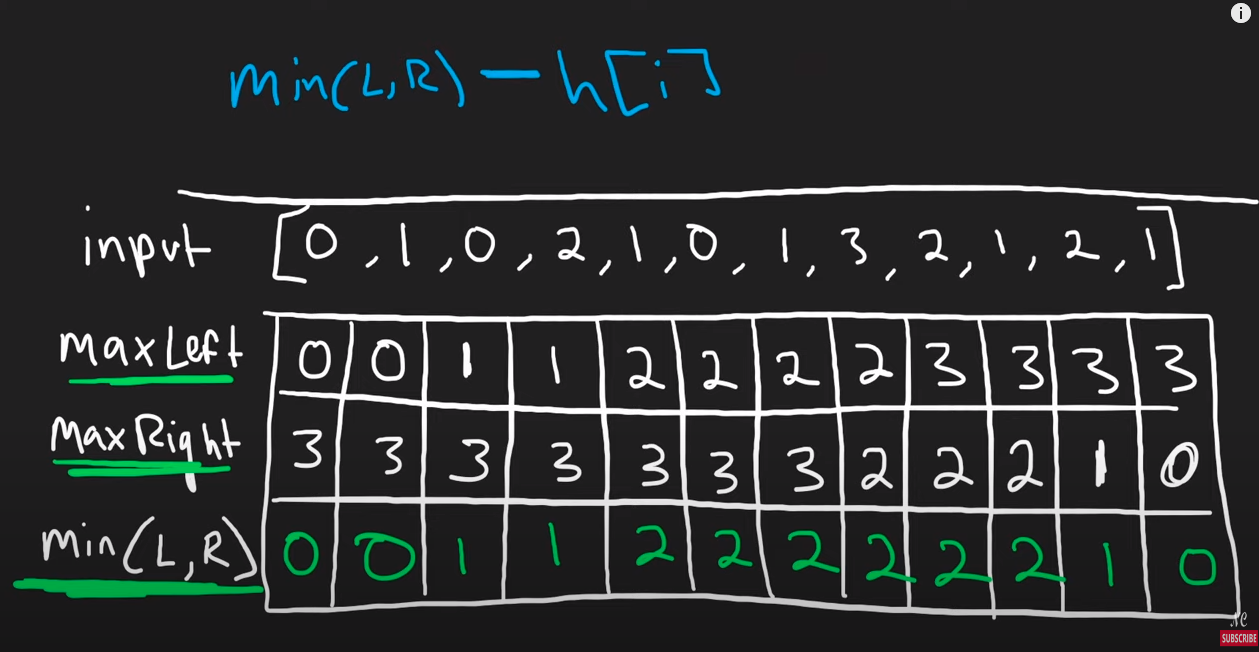

# 2b. Stack

### 20. Valid Parentheses (easy)

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

1. Open brackets must be closed by the same type of brackets.
2. Open brackets must be closed in the correct order.
3. Every close bracket has a corresponding open bracket of the same type.

In [22]:
# attempt
# big O for this attempt
# time complexity: O(n)
# space complexity: O(n) (fairly certain. More like O(n+m) i think because you need a stack and a hashmap, but that is essentially O(n))
class Solution:
    def isValid(self, s: str) -> bool:
        
        # you've seen this before, need a "stack" and a hashmap (i think)
        stack = []
        hashmap = {
            ')' : '(',
            ']' : '[',
            '}' : '{'
        }

        for p in s:
            # if p is an opening paranthese, put it in the stack
            if p in hashmap.values():
                stack.append(p)
            # if p is a closing paranthese and there is something in the stack
            elif p in hashmap and len(stack) > 0:
                # check if the last opening paranthese matches this closing paranthese
                o = stack.pop(-1)
                if o != hashmap[p]:
                    return False
            else:
                return False
            
        # stack must be empty in the end. it means all opening parantheses have been closed
        if len(stack) == 0:
            return True
        else:
            return False
# status = success
# NOTE: time and space complexity is average... ~50%. but my attempt and then neetcode solution have basically identical performance
# NOTE: saw this problem before and knew the intuition...
# NOTE: code probably has more if, elif, else statements than necessary, but that's okay for a first attempt

In [4]:
test = [1,2,3]

t = test.pop(-1)

print(t)
print(test)

3
[1, 2]


In [16]:
# solution
# big O for this solution
# time complexity: O(n)
# space complexity: O(n)
class Solution:
    def isValid(self, s: str) -> bool:
        Map = {")": "(", "]": "[", "}": "{"}
        stack = []

        for c in s:
            if c not in Map:
                stack.append(c)
                continue
            if not stack or stack[-1] != Map[c]:
                return False
            stack.pop()

        return not stack

In [23]:
# code behavior

def test(lst):
    return not lst

lst1 = ['(']
print(test(lst1))

print('~'*40)

lst2 = []
print(test(lst2))

False
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True


#### explanation

my own: start by creating a hashmap that maps closing parantheses to their corresponding opening parentheses. then initiate an empty list that will be your stack

then start iterating through the input string. if the currenter character is not in the hashmap keys, that means it is an opening paranthese. in that case append that character to your stack and go to the next iteration right away (continue). 

the next if statement will occur in the event that the current character is a closing paranthese. 

            if not stack or stack[-1] != Map[c]:
                return False

this statement checks if the stack is empty (not stack) or if the last item in the stack (stack[-1]) doesn't match the current closing parantheses using the hashmap. if either of these conditions are met, which are:
1. your current character is a closing paranthese and your stack is empty, meaning that no matter how many characters come after, this closing paranthese will not be completed
2. the last item in the stack is an opening paranthese that does not match your current closing paranthese, like (] for example
then return False

the last line in the loop is the following:

            stack.pop()

this only occurs when your current character is a closing paranthese, and the last character in the stack is the corresponding opening paranthese. in which case, remove the last item in the stack and continue iterating until you've gone through every character or the return False block is executed

the last line of code is a bit confusing

            return not stack
            
essentially return True if your stack is empty (meaning a valid input), false otherwise. as seen in the cell above, if you have an empty list it returns True, and if you have a list of items in it it returns False. i am not entirely sure about the intricacies of this, but the following lines of code would do just as well and is more readable, albeit more verbose and perhaps redundant (as seen in my solution)

            if len(stack) == 0:
                return True
            return False

### 155. Min Stack (medium)

Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.

Implement the MinStack class:

* MinStack() initializes the stack object.
* void push(int val) pushes the element val onto the stack.
* void pop() removes the element on the top of the stack.
* int top() gets the top element of the stack.
* int getMin() retrieves the minimum element in the stack.

You must implement a solution with O(1) time complexity for each function.

In [10]:
# attempt
# big O for this attempt
# time complexity: O(1)? would've failed otherwise?
# space complexity: O(1)?
class MinStack:

    def __init__(self):
        self.stack = []

    def push(self, val: int) -> None:
        self.stack.append(val)        

    def pop(self) -> None:
        self.stack.pop()

    def top(self) -> int:
        return self.stack[-1]

    def getMin(self) -> int:
        return min(self.stack)
    
# status = success
# NOTE: real bad time complexity, but good space complexity
# NOTE: relied on min built in func for getMin... also doesn't feel like I learned anything from this problem so far

In [13]:
# solution
class MinStack:
    def __init__(self):
        self.stack = []
        self.minStack = []

    def push(self, val: int) -> None:
        self.stack.append(val)
        val = min(val, self.minStack[-1] if self.minStack else val) # check explanation
        self.minStack.append(val)

    def pop(self) -> None:
        self.stack.pop()
        self.minStack.pop()

    def top(self) -> int:
        return self.stack[-1]

    def getMin(self) -> int:
        return self.minStack[-1]

In [12]:
# code behavior

test = [1,-1,3,5,-6]

one = 1
zero = 0

print(min(test))
print(min(one, zero))
print(min(one,one))

-6
0
1


#### explanation

my own: the solution builds on my idea by creating another stack, minStack. the intuition behind it is that whenever you push a new value to the main stack, there is an associated minimum value with that push. the minStack array is meant to keep track of that by essentially keeping a record of the minimum values. the most "important" lines of code happen in the push method.

    def push(self, val: int) -> None:
        self.stack.append(val)
        val = min(val, self.minStack[-1] if self.minStack else val)
        self.minStack.append(val)
        
first, simply append the value (val) to the main stack. then, set the val variable to the minimum between the current value (itself, which is val) and the last item in the minStack, if there is one. if there is nothing in minStack, the new min is simply the current value. then once you have found the new minimum, add it so the minStack array. the last item in the minStack array will always be the minimum value of the main stack, since it's purpose is to keep track of the minimum after every push and pop

    def pop(self) -> None:
        self.stack.pop()
        self.minStack.pop()

the pop method just removes the last item in each stack. for the main array that is obvious, but for the minStack it might not immediately make sense. the reason this works is that minStack knows the previous min after you remove the last one because it kept a record of every minimum up to that point

the last two methods are self explanatory. top simply returns the last item in the main stack, and getMin returns the last item in minStack since the last item in that stack is the current minimum value

### 150. Evaluate Reverse Polish Notation (medium)*

You are given an array of strings tokens that represents an arithmetic expression in a Reverse Polish Notation.

Evaluate the expression. Return an integer that represents the value of the expression.

Note that:

* The valid operators are '+', '-', '*', and '/'.
* Each operand may be an integer or another expression.
* The division between two integers always truncates toward zero.
* There will not be any division by zero.
* The input represents a valid arithmetic expression in a reverse polish notation.
* The answer and all the intermediate calculations can be represented in a 32-bit integer.

In [34]:
class Solution:
    def evalRPN(self, tokens: list) -> int:

        operators = ['+', '-', '*', '/']

        operatorStack = []
        operandStack = []
        
        for c in tokens[::-1]:

            if c in operators:
                operatorStack.append(c)
            else:
                operandStack.append(c)

        # get the last number
        operation = int(operandStack.pop())

        # need to look backwards
        for i in range(len(operandStack)):
            number = int(operandStack.pop())
            symbol = operatorStack.pop()
            if symbol == '+':
                operation += number
            elif symbol == '-':
                operation -= number
            elif symbol == '*':
                operation *= number
            elif symbol == '/':
                operation //= number

        return operation
    
# status = failure
# NOTE: could only get the easiest example. something flawed with the logic
# NOTE: failing the cases where there are multiple operators following each other in the input array

In [43]:
# solution
# time complexity O(n)
# space complexity O(n)
class Solution:
    def evalRPN(self, tokens: list) -> int:
        stack = []
        for c in tokens:
            # if c is an operator, that means that there is atleast 2 numbers in the stack (either the first two numbers at the beginning, or the result of a calculation and new number)
            # stack.pop() twice to get the numbers, and depending on which operator c is, perform a specific calculation
            if c == "+":
                # simply add the two numbers and append the result back to the stack
                stack.append(stack.pop() + stack.pop())
            elif c == "-":
                # since order matters here, "a" and "b" need to be assigned and "a" needs to be substracted from "b"
                a, b = stack.pop(), stack.pop()
                stack.append(b - a)
            elif c == "*":
                # same as + operator, but with *
                stack.append(stack.pop() * stack.pop())
            elif c == "/":
                # basically same as -, but with /. the int conversion is to round towards 0
                a, b = stack.pop(), stack.pop()
                stack.append(int(float(b) / a))
            # if no operators are encountered (meaning c will be an integer), simply append c to the stack
            else:
                stack.append(int(c))
        return stack[0]

#### explanation 

my own: this problem is actually fairly simple. the examples given by the description seemed to have confused me more than helped. 

the code itself is straightforward. the idea is to build a stack by appending numbers to it, removing them from the stack and performing an operation on them when an operator is encountered then appending back into the stack the resulting value. at the end we're left with a single number in the stack, which is what we return and is what the RPN is evaluated to. refer to comments on code for line by line explanation

In [4]:
# rework. do this later, not right after viewing solution
class Solution:
    def evalRPN(self, tokens: list) -> int:
        # want to add and pop numbers from the stack as we go
        # remember: operands are followed by their operators
        # iterating through the list backwards was NOT a good idea

        stack = []

        for c in tokens:
            if c == '+':
                stack.append(stack.pop() + stack.pop())
            elif c == '-':
                # "b" will be the number that needs to be substracted from, since order matters here
                a, b  = stack.pop(), stack.pop()
                stack.append(b - a)
            elif c == '*':
                stack.append(stack.pop() * stack.pop())
            elif c == '/':
                # similar idea as in substraction
                # the int(float(b/a)) is to deal with the "The division between two integers always truncates toward zero"
                # the division block simply does not work without this
                a, b  = stack.pop(), stack.pop()
                stack.append(int(float(b/a)))
            else:
                stack.append(int(c))

        return stack[0] 

# status = success

In [10]:
# how does int(float(b/a)) work?
a = 5
b = 9

c = b/a
print(c)
print('~'*40)
      
d = float(b/a)
print(d)
print('~'*40)

e = int(float(b/a))
print(e)
print('~'*40)

# it looks like the additional float conversion may not be necessary? perhaps it's to cover some edgecases
f = int(b/a)
print(f)

1.8
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1.8
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1


### 22. Generate Parantheses (medium)@ <- explanation is incomplete. come back once some progress has been made in the backtracking module

Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

In [27]:
# attempt
class Solution:
    def generateParenthesis(self, n: int) -> list:
        # with n=3, that means there's atleast 3 opening and 3 closing parantheses, 6 parantheses total and 5 combos
        # with n=1, that means there's atleast 1 opening and 1 closing parantheses, 2 parantheses total and 1 combo
        # appears to be n*2-1 combos for a given n
        # this may or may not be a good approach/useful

        # issue: need to know how to build the parantheses + what's already in there

        stack = ['('*n for i in range(n*2-1)]
        result = []

        for value in stack:
            for i in range(n):
                value += ')'
            if value not in result:
                result.append(value)
            
            l, r = 0, len(stack)-1

            while l < r:
                r -= 1
                pass

        # can't figure it out
        return result
# status = failure
# NOTE: really unsure what I could've done differently. knew exactly what the question was asking for but couldn't come up with anything

In [19]:
# solution
# using a recursive method
# this is brand new to me: the backtrack function is calling itself. hence why it's called recursive?
class Solution:
    def generateParenthesis(self, n: int) -> list:
        # only add open paranthesis if open < n
        # only add a closing paranthesis
        
        stack = []
        res = []
        
        def backtrack(openN, closedN):
            print(stack)
            
            if openN == closedN == n:
                print('!'*40) # appears 5 times with n = 3, like the number of valid pairs
                res.append("".join(stack))
                return

            if openN < n:
                stack.append("(")
                backtrack(openN + 1, closedN)
                stack.pop()
            if closedN < openN:
                stack.append(")")
                backtrack(openN, closedN + 1)
                stack.pop()
    
        backtrack(0, 0) # only called once
      
        return res

In [35]:
# other solution from a youtube comment. seems more straightforward than with the stack
# however I simply don't get how the correct number of iterations is executed
class Solution:
    def generateParenthesis(self, n: int) -> list:

            res = []

            def backtrack(open_n, closed_n, path):


                if open_n == closed_n == n:
                    res.append(path)
                    return


                if open_n < n:
                    backtrack(open_n + 1, closed_n, path + "(")


                if closed_n < open_n:
                    backtrack(open_n, closed_n + 1, path + ")")

            backtrack(0, 0, "")
            return res

#### explanation

my own: what you have to do for this problem is straightforward; however i have a hard time with the execution. below is an image of the intuition that will be used to write the code and will help with the explanation. seems like it would also help to have experience in recursions/backtracking in order to better understand this.

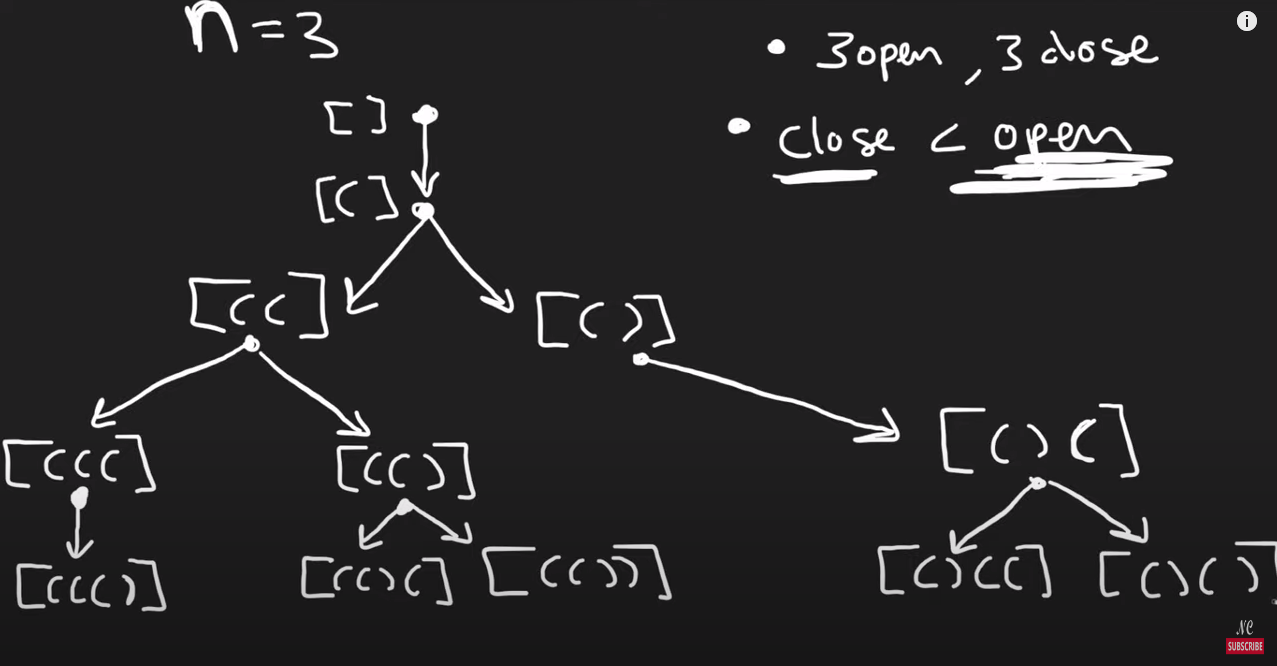

this explanation is for the neetcode solution. the idea here is that for n pair, you have n opening parantheses and n closing parentheses. when adding parentheses, in order to have a valid output you can only add a closing parenthesis if the number of closing parentheses is lower than then number of open parentheses. it is easy to verify that using the picture or looking at the following invalid examples: n = 1 [)(] / n = 2 [())(]

with these two things in mind we can easily understand the code. begin by initating two empty lists, one named stack and the other named res. then within your method, create another method that will be used recursively called backtrack. it takes two arguments: the number of open parantheses and the number of closed parantheses (both initially beginning at 0). 

the first condition (which will essentially be the ending condition) looks at if your number of open parantheses is equal to your number of closed parantheses and if the number of closed parantheses is also equal to n: if that is true, you've added all possible parantheses and are ready to end the backtracking function. ***this is once a valid set is created, but i'm not sure how the function finds all of them, or how it even continues after finding the first one***

otherwise, if there are less opening parantheses than n (which will be the maximum number you can add), then append an opening paranthesis to your stack, and call your backtrack function this time incrementing the value of openN by 1. ***currently unsure why you have to use stack.pop(), or how that doesn't simply result in an empty stack*** 

in the last case, if there are less closed parantheses than open parantheses, you can append to your stack a closing paranthesis and once again call your backtrack function but incrementing the value of closedN by 1 this time. ***same uncertainties as for the previous condition***

once your backtrack function has completed its work, you're ready to return the res variable that now has all valid pairs

In [18]:
test = Solution()
param = test.generateParenthesis(3)
print(param)

[]
['(']
['(', '(']
['(', '(', '(']
['(', '(', '(', ')']
['(', '(', '(', ')', ')']
['(', '(', '(', ')', ')', ')']
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
['(', '(', ')']
['(', '(', ')', '(']
['(', '(', ')', '(', ')']
['(', '(', ')', '(', ')', ')']
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
['(', '(', ')', ')']
['(', '(', ')', ')', '(']
['(', '(', ')', ')', '(', ')']
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
['(', ')']
['(', ')', '(']
['(', ')', '(', '(']
['(', ')', '(', '(', ')']
['(', ')', '(', '(', ')', ')']
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
['(', ')', '(', ')']
['(', ')', '(', ')', '(']
['(', ')', '(', ')', '(', ')']
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
['((()))', '(()())', '(())()', '()(())', '()()()']


### 739. Daily Temperatures (medium)*

Given an array of integers temperatures represents the daily temperatures, return an array answer such that answer[i] is the number of days you have to wait after the ith day to get a warmer temperature. If there is no future day for which this is possible, keep answer[i] == 0 instead.

In [2]:
# attempt
class Solution:
    def dailyTemperatures(self, temperatures: list) -> list:
        
        answer = []

        for index, value in enumerate(temperatures):

            for i in range(index, len(temperatures)):
                if temperatures[i] > value:
                    answer.append(i - index)
                    break
                elif i == len(temperatures)-1:
                    answer.append(0)
            

        return answer
    
# status = failure
# NOTE: brute force method. works but is too slow to be accepted

In [5]:
# solution
class Solution:
    def dailyTemperatures(self, temperatures: list) -> list:
        res = [0] * len(temperatures)
        stack = []  # pair: [temp, index]

        for i, t in enumerate(temperatures):
            while stack and t > stack[-1][0]:
                stackT, stackInd = stack.pop()
                res[stackInd] = i - stackInd
            stack.append((t, i))
        return res

#### exaplanation

my own: the idea here is having a "monotonic decreasing stack" - every value in it will be decreasing or equal to the last one. for this stack we will be storing both temp and index, and so the decreasing value refers only to the temperature. as a result, the stack in this case will be a list of lists

begin by creating a res array filled with 0s, the length of the temperatures input array, and an empty stack array. then begin iterating through the index and temp values in temperatures using enumerate.

begin a while loop. this is where the importance of the decreasing stack can be highlighted: the loop goes on while there are items in it and while the current temperature (t) is greater than the last item in the stack (stored temperature in this case is on index 0 and stored index on index 1, and last item is always -1, which is where the stack[-1][0] comes from). when your current temperature is greater than the temperature last in the stack, pop that last item in the stack and store the value and index it contained in temporary variables. the stored index (stackInd) indicates where this temperature was in the input array, which is the index you will use in res to update the amount of days until this stored temperature found a greater temperature (defaulted to 0). you can calculate the distance using the current index i (it will always be greater) and substracting from it the index stored. if the loop ends, that means the either your stack is empty or the current temperature is smaller than the last item in the stack, in which case you append to your stack the current temperature and index.

once you've run through every value in temperatures, return res. notice if there are remaining items in the stack, it means that some temperatures did not have a greater temperatures after them. in which case, nothing happens - this is why the res array is initialized filled with 0s. there is no calculation between current index and stored index to be made.

### 853. Car Fleet (medium)*

There are n cars going to the same destination along a one-lane road. The destination is target miles away.

You are given two integer array position and speed, both of length n, where position[i] is the position of the ith car and speed[i] is the speed of the ith car (in miles per hour).

A car can never pass another car ahead of it, but it can catch up to it and drive bumper to bumper at the same speed. The faster car will slow down to match the slower car's speed. The distance between these two cars is ignored (i.e., they are assumed to have the same position).

A car fleet is some non-empty set of cars driving at the same position and same speed. Note that a single car is also a car fleet.

If a car catches up to a car fleet right at the destination point, it will still be considered as one car fleet.

Return the number of car fleets that will arrive at the destination.

In [10]:
# attempt
class Solution:
    def carFleet(self, target: int, position: list, speed: list) -> int:
        
        # stores the amount of fleet?
        stack = []

        # stores every position every car will be at before reaching destination
        # not sure if helpful
        travel = []

        for p, s in zip(position, speed):
            t = []
            while p <= target:
                t.append(p)
                p += s
            travel.append(t)
            
        # this would be the maximum distance
        # is there a way to place every car on this range and see where they meet?
        road = [[]] * (target - min(position))
        
        # this would give an initial "map" of where each car begins
        # map is most likely a bad idea - all the cars will end up at the last position, will be
        # difficult to determine using it when they meet
        for i, p in enumerate(position):
            road[p].append(i)

# status = failure
# NOTE: couldn't think of a way that wouldn't have a ridiculously high time complexity
# NOTE: it also seems a lot of these stack problems have a simpler solution that does not really on a stack...

In [13]:
# solution
class Solution:
    def carFleet(self, target: int, position: list, speed: list) -> int:
        pair = [(p, s) for p, s in zip(position, speed)]
   
        stack = []
        for p, s in sorted(pair)[::-1]:  # Reverse Sorted Order - want to start with the car that is furthest along i.e has the "highest" position
            stack.append((target - p) / s) # caculates the time it takes to get to the target
            if len(stack) >= 2 and stack[-1] <= stack[-2]: # checks if there is at least 2 items in the stack (2 fleets) and compares their time
                # if the newly added car has a faster time (i.e is smaller) than the time for the fleet before, you can pop the newly removed car
                # since now it will be travelling at the same speed as the fleet
                stack.pop()
        return len(stack)

#### explanation

my own: the code for this problem is actually fairly simple. begin by creating a list which contains pairs of positions and speeds from your input arrays. also create an empty list which will be your stack and will be use to calculate the amount of fleets

start iterating through your array with position/speed pairs that you created, but make sure it is sorted and traversed in reversed order. it is important to start with the cars at the end positions first because they are likely to become the bottlenecks and assimilate other cars to their fleet. the first operation is to calculate the time it takes for the current car to make it so the end, using the target minus the position, then divided by the speed. append this time to your stack. 

then check if there are atleast 2 items in the stack. stack[-2] will essentially be the previous car/fleet during this iteration, and stack[-1] will be the car you just added (both defined as time, since that is what you add to your stack). if the time of the car you just added is smaller than the time of the previous car/fleet, then it will be assimilated to that fleet because even if it is faster it cannot pass it: therefore you must use stack.pop() to remove it, it is no longer relevant because it is now part of the fleet. 

once every pair has been iterated over, the length of the stack will indicate how many fleet there are, and so simply return that.

In [19]:
test = [[4,1000],[1,30000], [3, 1000000], [2,2000]]
test.sort() # looks like sort() and sorted() both sort by the first element lists contained within a list
test

[[1, 30000], [2, 2000], [3, 1000000], [4, 1000]]

### 84. Largest Rectangle in Historgram (hard)*

Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.

In [6]:
class Solution:
    def largestRectangleArea(self, heights: list) -> int:
        
        # use to store every valid area?
        stack = []

        res = 0

        for i in range(len(heights)):

            # calculate current bar every time
            res = max(res, heights[i] * 1)
    
            # if reaching end of the array and current bar is greater or equal to previous
            if i == len(heights) - 1 and heights[i] >= heights[i-1]:
                stack.append(heights[i])
            # if current bar smaller than previous or reached the end of the array
            if (stack and heights[i] < stack[-1]) or (stack and i == len(heights)-1):
                bottleneck = min(stack)
                width = len(stack)
                area = bottleneck * width
                res = max(res, area)
                stack.clear()
            else:
                stack.append(heights[i])

        return res
    
# status = failure
# NOTE: works for about a 1/3 of test cases...missing some logic

In [7]:
# solution
class Solution:
    def largestRectangleArea(self, heights: list) -> int:
        maxArea = 0
        stack = []  # pair: (index, height)

        for i, h in enumerate(heights):
            start = i
            while stack and stack[-1][1] > h:
                index, height = stack.pop()
                maxArea = max(maxArea, height * (i - index)) # the current index minus the index the height was stored gives you the width
                start = index
            stack.append((start, h))

        # if there are pairs remaining in our stack by the end
        # it means that they extended for the entire length of the heights array
        for i, h in stack:
            maxArea = max(maxArea, h * (len(heights) - i))
        return maxArea


#### explanation

my own: the idea behind this solution is to star index and height pairs and using a stack to see how far the current histogram bar can extend. begin by initating your maxArea variable to 0 and creating an emtpy stack.

next up, iterate through the index and height in heights using enumerate. your start index will initially be the current index i, however that might be subject to change if the current bar can be extended left (meaning that there are smaller heights on its left). at each iteration you know how far your current bar can be extended left, but you don't know yet how far right it can be extended. this is important to understand for the while loop.

start a while loop that continues while there are items in the stack and while the height ([1]) of the last item ([-1]) in the stack is greater than the current height. those past heights will not be considered anymore because they can't be extended right any further: this is because the current height is smaller. however despite not being considered any further, the area they can make must be calculated to see if you can update your current max. do that by popping the last item in the stack and storing the index and height, then calculate the area using: heigth * (i - index) and update your max area if necessary. this part is confusing: you now update your start index to the index of the last item you popped: that is because the current height can be extended left up to that point. 

once your while loop end, you know how far left your current height can be extended (it will just be start=i if it is the current greatest height in relation to the stack; that is intuitive), and you can append your index (called start) and height to the stack.

once you've gone through the entire heights array, there might be items remaining in the stack: that indicates that they extend from their index to the end of the array. iterate through each item remaining in the stack, using its height and the length of the heights array minus the stored index to calculate area, and update your maxArea if necessary.

finally, return maxArea

# 3a. Binary Search

note: so far when considering binary search problems, it appears finding some kind of minimum/maximum is involved. it differs from sliding window because typically only one pointer gets moved at a time (?). it also consists (every time so far) of starting in the middle of the range between the left and right pointers. another common thing with binary search is it seems to also involve sorted arrays

### 704. Binary Search (easy)

Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums. If target exists, then return its index. Otherwise, return -1.

You must write an algorithm with O(log n) runtime complexity.

In [11]:
# attempt
# big O for this attempt
# time complexity: O(n)
# space complexity: O(n)
class Solution:
    def search(self, nums: list, target: int) -> int:
        
        for index, number in enumerate(nums):
            if target == number:
                return index
        return -1
# status = success
# NOTE: this isn't really a success because they asked for O(log n) time complexity and this is O(n)
# NOTE: first bineary search problem so had no idea what the intuition is

In [10]:
# solution
# big O for this solution
# time complexity: O(log n)
class Solution:
    def search(self, nums: list, target: int) -> int:
        l, r = 0, len(nums) - 1

        while l <= r:
            m = l + ((r - l) // 2)  # (l + r) // 2 can lead to overflow
            if nums[m] > target:
                r = m - 1
            elif nums[m] < target:
                l = m + 1
            else:
                return m
        return -1

#### explanation
my own: begin by creating 2 pointers, "l" at the beginning and "r" at the end. The idea is then to calculate "m", the midway point index, by taking "l" and "r" and diving it by 2 and comparing the number at that index to your target to direct your search. 

NOTE: (l+ r) // 2 would do just fine, but the code shown above is to deal with the case where the length of your array might be nearing the limit of 32-bit integers in order to avoid overflow. 

once you have calculated m, check the number there (nums[m]) and compare it to your target. if this number is bigger than your target, you know everything to the "right" of the middle point will also be bigger since your array is sorted in ascending order and there's no point in considering those numbers. you then set your right pointer to the middle index minus 1 (r = m - 1). on the other hand, if your number is smaller than the target, you know everything to the "left" of the middle point will be smaller as well, and so you set your left pointer to the middle index plus 1 (l = m + 1). continue on like this.

if the number is neither greater or smaller than the target, that means you found your number and can return m, which will be the index. in the event that the number isn't in the array, the while loop will end because your left pointer will pass your right pointer, in which case you simply return -1 

### 74. Search a 2D Matrix (medium)

You are given an m x n integer matrix matrix with the following two properties:

* Each row is sorted in non-decreasing order.
* The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true if target is in matrix or false otherwise.

You must write a solution in O(log(m * n)) time complexity.

In [12]:
# attempt
class Solution:
    def searchMatrix(self, matrix: list, target: int) -> bool:
        for row in matrix:
            if target in row:
                return True
        return False
# status = success
# NOTE: this works but doesn't really make use of anything concepts... and it is slow

In [25]:
# reworked attempt
class Solution:
    def searchMatrix(self, matrix: list, target: int) -> bool:
        
        for row in matrix:
            # if last number in row is smaller than target, go to the next row
            if row[-1] < target:
                continue
            # if last number in row is greater than target, search row
            elif row[-1] > target:
                # search this row
                l, r = 0, len(row) - 1
                while l <= r:
                    m = (l + r) // 2
                    if row[m] > target:
                        r = m - 1
                    elif row[m] < target:
                        l = m + 1
                    else:
                        return True
            # if the last number happens to be the target, return True
            else:
                return True
        # if you go through the entire matrix without triggering any of the True blocks, return False
        return False
    
# status = success
# NOTE: although this uses 2 pointers and binary search logic, it is just as slow as my previous first attempt
# NOTE: i also only make use of binary search when looking through the row, but not the matrix 

In [26]:
# solution
class Solution:
    def searchMatrix(self, matrix: list, target: int) -> bool:
        ROWS, COLS = len(matrix), len(matrix[0])

        top, bot = 0, ROWS - 1
        while top <= bot:
            row = (top + bot) // 2
            if target > matrix[row][-1]:
                top = row + 1
            elif target < matrix[row][0]:
                bot = row - 1
            else:
                break

        if not (top <= bot):
            return False
        
        l, r = 0, COLS - 1
        while l <= r:
            m = (l + r) // 2
            if target > matrix[row][m]:
                l = m + 1
            elif target < matrix[row][m]:
                r = m - 1
            else:
                return True
        return False

#### explanation
my own: the idea here is to perform 2 binary searches: one on the matrix itself to figure out which row is worth looking into, and another on the row itself once we've found an appropriate one. the first line defining ROWS and COLS just retrieves the dimensions of the matrix. 

this following section is the first binary searches that looks through the matrix for an appropriate row. top begins at index 0 which is the first row (and will contain the smallest numbers), and bottom the length of the matrix - 1 which is the bottom row (and will contain the biggest numbers). calculate the middle row, row = (top + bot) // 2, and check the last and first numbers in that row. if the target is bigger than the last number in the row, you need to look further down in the matrix and therefore set your top index to current row index + 1, since any row above that current middle row will only contain smaller numbers. in a similar logic, if the target is smaller than the first number in the row, then you need to look further up in the matrix and set your bottom index to current row - 1, since any row further down in the matrix will only contain bigger numbers. NOTE: it is a little confusing how top rows contain smaller numbers and bottom rows contain bigger numbers, but the code logic definitely checks out. if neither the if or elif conditions are met, that means that the target will fit within the range of current row, and you will need to perform binary search on that row (break out of the loop to continue to the next binary search).

        top, bot = 0, ROWS - 1
        while top <= bot:
            row = (top + bot) // 2
            if target > matrix[row][-1]:
                top = row + 1
            elif target < matrix[row][0]:
                bot = row - 1
            else:
                break
                
this small block is just in case you don't find any appropriate rows, and top becomes greater than bottom. in which case simply return False

        if not (top <= bot):
            return False
            
last, perform binary search on the row where your target might be since it falls within the range of the row. this uses the exact same logic as in problem 704. Binary Search. the length of the array is already defined earlier on as COLS (-1 to not go out of bounds) and the row index for the matrix was found in the first binary search of this problem. once again, if target is neither greater or smaller than the current number it means that target is the same as current number and you can return True. otherwise, if your while loop ends because the left pointer becomes greater than right pointer, your search ends and the target was not found and therefore return False

        l, r = 0, COLS - 1
        while l <= r:
            m = (l + r) // 2
            if target > matrix[row][m]:
                l = m + 1
            elif target < matrix[row][m]:
                r = m - 1
            else:
                return True
        return False

### 875. Koko Eating Bananas (medium)*

Koko loves to eat bananas. There are n piles of bananas, the ith pile has piles[i] bananas. The guards have gone and will come back in h hours.

Koko can decide her bananas-per-hour eating speed of k. Each hour, she chooses some pile of bananas and eats k bananas from that pile. If the pile has less than k bananas, she eats all of them instead and will not eat any more bananas during this hour.

Koko likes to eat slowly but still wants to finish eating all the bananas before the guards return.

Return the minimum integer k such that she can eat all the bananas within h hours.

In [11]:
# attempt
class Solution:
    def minEatingSpeed(self, piles: list, h: int) -> int:
        # h is the hours koko has to eat
        # k is banana/hour
        # 3 factors to consider: number of piles, amount in piles, time left
        
        # length of pile
        p = len(piles)
        # average time per pile
        avg = h/p

        sortedPiles = sorted(piles)
        

        l, r = 0, p-1

        middle = (l+r)//2
        num = sortedPiles(middle)
        
        # really unsure where to go from here...
        i = num*avg

# status = failure
# NOTE: knew at some point binary search was necessary but couldn't see how/where to implement it

In [1]:
# solution
class Solution:
    def minEatingSpeed(self, piles: list, h: int) -> int:
        l, r = 1, max(piles)
        res = r

        while l <= r:
            k = (l + r) // 2

            totalTime = 0
            for p in piles:
                totalTime += math.ceil(float(p) / k)
            if totalTime <= h:
                # in video he does res = min(res, k)... not sure if that's better or redundant
                res = k
                r = k - 1
            else:
                l = k + 1
        return res

#### explanation
my own: once again, this is a binary search problem, but this time you have to think about where your left and right pointer begin and end. a good understanding of what the problem asks for is also very important. koko can only eat 1 pile at most an hour, and has h hours to to eat every pile, and so h needs to be <= len(piles). you're asked to find the minimum banana/hour eating speed, k, for koko to eat all in the piles in h hours. this means that your left pointer will always be 1, since you can't have her eat 0 banana per hours, and the value for the right pointer will be max(piles) because the most banana per hour you would ever want her to eat is the number of bananas in the biggest pile (since you are looking for a minimum). so the range is between 1 and max(piles).

your result (res) starts at r, which is initially max(piles). to reiterate why that is we can look at the following example: if your pile array looks like this [30,11,23,4,20] and h = 5, you only have 1 hour per pile because len(pile) = 5. therefore, in order to eat the biggest pile you will need k = 30, since it's the biggest pile and koko only has a single hour to eat it. 

the binary search then starts to find the minimum eating speed. find the middle point in the array k = (l + r) // 2 for the eating speed, and initiate a time variable. then iterate through the piles and add to totalTime to find out how long it would take koko to eat every pile with the current eating speed k (the reason for math.ceil(p/k) is because koko will not move on to another pile until the hour is done, and so you want to round up when seeing how long it would take to get through a pile)

the next block is probably the most important:

            if totalTime <= h:
                res = k
                r = k - 1
            else:
                l = k + 1

looking at the else block first - that means that totalTime was greater than h and koko did not have enough time to eat all the bananas and so k was too small. adjust your left pointer to start where you were + 1, and keep the right pointer where it is because you will want to look for a greater value for k. if totalTime was smaller or equal to h, it means koko was able to eat all bananas and that you find a solution, but not necessary the best one (the minimum k) - therefore update your result to k but continue looking for a smaller k by adjust your right pointer to where you were - 1 and keeping the left pointer where it was. the loop will continue this way until the left pointer passes the right one, in which case it means you must have found the minimum value for k. once outside the loop, simply return k and that will be the minimum eating speed for koko to eat all the bananas

In [20]:
# rework. do this later when the concept have had time to sink in
class Solution:
    def minEatingSpeed(self, piles: list, h: int) -> int:
        # koko will not eat more than 1 pile in an hour even if she's done the current pile
        # need to iterate though range and pile

        # range should be 1 to the max banans she would eat
        l, r = 1, max(piles)

        current_min = max(piles)

        while l <= r:
            # total time it takes to eat every pile
            total_time = 0
            # current k
            k = (l + r) // 2
            for i in piles:
                time_taken = math.ceil(i/k)
                total_time += time_taken

            # it took too long to eat all the bananas, need to increment left
            if total_time > h:
                l = k + 1
            # found a solution, but might not be optimal and must decrement right
            else:
                current_min = min(current_min, k)
                r = k - 1
        
        return current_min

# status = success

### 153. Find Minimum in Rotated Sorted Array (medium)*

Suppose an array of length n sorted in ascending order is rotated between 1 and n times. For example, the array nums = [0,1,2,4,5,6,7] might become:

[4,5,6,7,0,1,2] if it was rotated 4 times.
[0,1,2,4,5,6,7] if it was rotated 7 times.
Notice that rotating an array [a[0], a[1], a[2], ..., a[n-1]] 1 time results in the array [a[n-1], a[0], a[1], a[2], ..., a[n-2]].

Given the sorted rotated array nums of unique elements, return the minimum element of this array.

You must write an algorithm that runs in O(log n) time.

In [16]:
# attempt
class Solution:
    def findMin(self, nums: list) -> int:
        l, r = 0, len(nums) - 1

        # 1 rotation essentially takes the last element and brings it to the beginning
        # unique elements only. is that relevant?
        # can't use sort() -> O(n log n) can't use min() -> O(n)
        # if need to solve in O(log n), restricted to only binary search? how to deal with rotations

        # if you knew how many times it was rotated, the answer would be nums[amount rotated]
        # unless it was rotated > n, then not sure

        while l <= r:
            m = (l + r) // 2

            if m + 1 < len(nums) and nums[m] > nums[m + 1]:
                return nums[m + 1]
            elif m - 1 >= 0 and nums[m] < nums[m - 1]:
                return nums[m]

            # how to move about the array, changing the pointers if solution isn't found?

            # looks at if its greater than the rest of the right side
            if nums[m] > max(nums[m+1:]):
                l = m + 1
            # looks at if its greater than the rest of the left side
            else:
                r = m - 1
                
# status = failure
# NOTE: some logic missing. the loop sometimes terminate without finding the solution, therefore returning None
# NOTE: made this needlessly complicated trying to look at neighbors. the neetcode solution is much simpler
# NOTE: finding the max of the remainder of the array was pointless considering the array is sorted already (although could be rotated)

In [12]:
# solution
class Solution:
    def findMin(self, nums: list) -> int:
        l , r = 0, len(nums) - 1 
        curr_min = float("inf")
        
        while l  <  r :
            mid = l + (r - l ) // 2
            curr_min = min(curr_min,nums[mid])
            
            # right has the min 
            if nums[mid] > nums[r]:
                l = mid + 1
                
            # left has the  min 
            else:
                r = mid - 1 
                
        return min(curr_min,nums[l])

In [18]:
# by just applying the logic of this solution to every possible rotation of this simple array we can see that it works
[1,2,3,5]
[5,1,2,3]
[3,5,1,2]
[2,3,5,1]

0 + (3 - 0) // 2

1

In [9]:
# solution in video
class Solution:
    def findMin(self, nums: list) -> int:
        res = nums[0]
        l, r = 0, len(nums) - 1
        
        while l <= r:
            if nums[l] < nums[r]:
                res = min(res, nums[l])
                break
            
            m = (l + r) // 2
            res = min(res, nums[m])
            if nums[m] >= nums[l]:
                l = m + 1
            else:
                r = m - 1
        return res

#### explanation

my own: neetcode has two ways of solving this, i like the regular solution better so i will explain that one rather than the video solution. 

initiate your left and right pointers, left being beginning of the array and right being the end of the array. also initiate a current min variable to update the minimum if possible each iteration

start your while loop that will go until your left pointer passes the right one. initiate your mid point variable by finding the middle between left (start) and right (end). update the current min if possible using the value that is at the middle for this iteration.

then it's very simple. check if the number at the middle point is greater than the value at the right pointer. if it is that means that the minimum is on that side, therefore you need to move up your left pointer to the middle + 1. otherwise it just means that the minimum is on the other side and you must move your right pointer to the middle - 1. checking the right side simply looks for the pivot point (pivot point being where nums[0] and nums[n-1] are next to each other - it really helps to think of the problem of looking for the pivot point), if it can't find it on the right then it must mean it's on the left

since the loop end before left passes right (therefore they never meet), instead of simply returning the current min, check one last comparing the current min to nums[l] and return that

### 33. Search in Rotated Array (medium)**

There is an integer array nums sorted in ascending order (with distinct values).

Prior to being passed to your function, nums is possibly rotated at an unknown pivot index k (1 <= k < nums.length) such that the resulting array is [nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]] (0-indexed). For example, [0,1,2,4,5,6,7] might be rotated at pivot index 3 and become [4,5,6,7,0,1,2].

Given the array nums after the possible rotation and an integer target, return the index of target if it is in nums, or -1 if it is not in nums.

You must write an algorithm with O(log n) runtime complexity.

In [12]:
# attempt
class Solution:
    def search(self, nums: list, target: int) -> int:
        # similar to 153. find minimum in rotated array, except this time looking for specific value
        # seems like to find where the target would fit in relative to the pivot point
        # then direct to search

        l, r = 0, len(nums) - 1

        while l <= r:

            m = (l+ r) // 2

            if nums[m] == target:
                return m

            # need to go to the pivot point
            if target < nums[m] and target < nums[r]:
                if nums[m] > nums[r]:
                    l = m + 1
                else:
                    r = m - 1
            # need to go opposite of pivot point
            elif target < nums[m] and target > nums[r]:
                if nums[m] > nums[r]:
                    r = m - 1
                else:
                    l = m + 1
            # else if number is greater than nums[m], need to find pivot point for sure
            else:
                if nums[m] > nums[r]:
                    l = m + 1
                else:
                    r = m - 1
       
        return -1

# status = failure
# NOTE: passed most test cases but seems to fail when list is ordered (either no rotations or n rotations) i.e the  outer else condition

In [6]:
# solution
class Solution:
    def search(self, nums: list, target: int) -> int:
        l, r = 0, len(nums) - 1

        while l <= r:
            mid = (l + r) // 2
            if target == nums[mid]:
                return mid

            # left sorted portion
            if nums[l] <= nums[mid]:
                if target > nums[mid] or target < nums[l]:
                    l = mid + 1
                else:
                    r = mid - 1
            # right sorted portion
            else:
                if target < nums[mid] or target > nums[r]:
                    r = mid - 1
                else:
                    l = mid + 1
        return -1

#### explanation

my own:

the code for this problem is hard to understand why it works without visualizations/concrete examples, and so the explanation will describe all 4 (technically 6) conditions using examples and the visual

for this problem finding the pivot point is not enough, which is how it differs from the previous problem - this is why using an approach too similar to problem 153 doesn't work (which is what i tried to do). here instead we need to look at the left sorted portion and the right sorted portion. 

here once you start your binary search, immediately check if the middle pointer is the target, and if it is return the index (which will be the same value as the pointer). otherwise we need to consider the left sorted portion and the right sorted portion. the following block cells will use examples to show the point

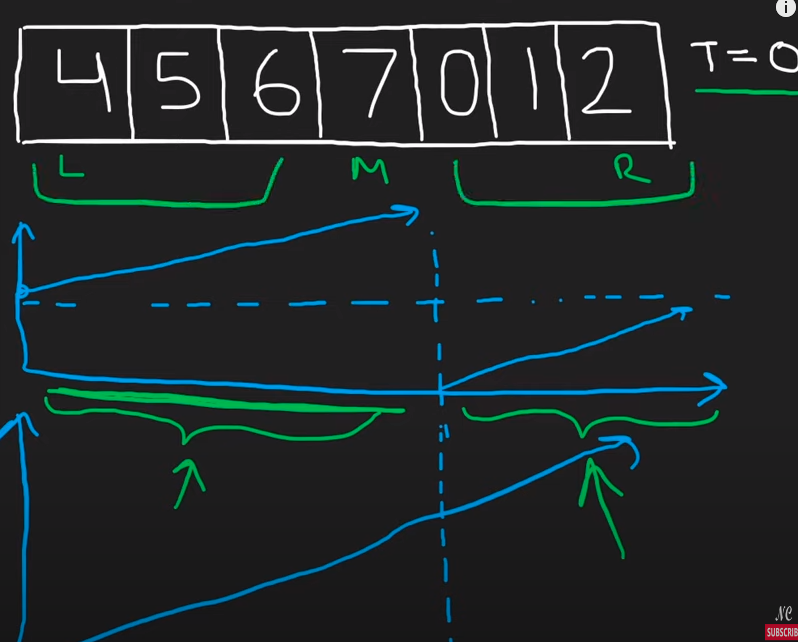

the left sorted portion essentially means before the pivot point, and the right sorted means at & after the pivot point in terms of problem 153. for this problem, if the array is already sorted or we reach the pivot point, we assume we are now in what is considered the left sorted portion

In [29]:
# taking this nums array as an example and considering the the first iteration of the binary search,
# we can explore each individual condition
nums = [4, 5, 6, 7, 8, 0, 1, 2]
l, r = 0, len(nums) - 1
m = (l+r)//2

def left_sorted(nums):
    # if the left most number is smaller than the middle numbers, we can assume we are in the left sorted portion 
    if nums[l] <= nums[mid]:
        # if the target (i.e 8) is greater than the middle, we know there is no point in checking the left side because we know every number will be smaller
        # on the other hand, if the target (i.e 0) is smaller than the left value most, we know every number on that side will be greater
        # in both cases, we indentified our target will not fit between l and m, and we need to go right
        if target > nums[mid] or target < nums[l]:
            # go right
            l = mid + 1
        # if neither cases are true, i.e target 4,5,6, these are all smaller than mid or greater than left
        # therefore we want to stay in the left sorted portion
        else:
            # go left
            r = mid - 1
            
print(m) # search starts at index 3, value 7

3


In [28]:
nums = [8, 0, 1, 2, 4, 5, 6, 7]
l, r = 0, len(nums) - 1
m = (l+r)//2


# means that left is not smaller or equal to mid, i.e nums[l] > nums[mid] and we are in the right sorted portion
def right_sorted(nums):
    # if our target (i.e 0) is smaller than mid, we know that there is no point in searching the right side since those numbers will be greater
    # or if our target (i.e 8) is greater than right, know the highest numbers will be on the left side
    # in both cases, we shift our search to the left side
    if target < nums[mid] or target > nums[r]:
        # go left
        r = mid - 1
    # if neither cases are true, i.e target 4,5,6,7, these are all smaller than left and greater than mid
    # therefore we need stay on the right side
    else:
        # go right
        l = mid + 1
        
print(m) # search still starts at index 3, value 2

3


### 981. Time-Based Key Value Store (medium)

Design a time-based key-value data structure that can store multiple values for the same key at different time stamps and retrieve the key's value at a certain timestamp.

Implement the TimeMap class:

TimeMap() Initializes the object of the data structure.
void set(String key, String value, int timestamp) Stores the key key with the value value at the given time timestamp.
String get(String key, int timestamp) Returns a value such that set was called previously, with timestamp_prev <= timestamp. If there are multiple such values, it returns the value associated with the largest timestamp_prev. If there are no values, it returns "".

In [5]:
# attempt
class TimeMap:

    def __init__(self):
        self.storage = {}

    def set(self, key: str, value: str, timestamp: int) -> None:
        if key in self.storage:
            self.storage[key].append([value, timestamp])
        else:
            self.storage[key] = [[value, timestamp]]

    def get(self, key: str, timestamp: int) -> str:
        if key in self.storage:
            values = self.storage[key]

            for v in values[::-1]:
                if v[1] <= timestamp:
                    return v[0]
                else:
                    continue
            return ""
        else:
            return ""

# status = success
# NOTE: although this succeeded, pretty terrible code. was mainly focusing on just answering the question, which is not good enough
# NOTE: intended to implement binary search in the get method but didn't have enough time

In [7]:
# solution
class TimeMap:
    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.keyStore = {}  # key : list of [val, timestamp]

    def set(self, key: str, value: str, timestamp: int) -> None:
        if key not in self.keyStore:
            self.keyStore[key] = []
        self.keyStore[key].append([value, timestamp])

    def get(self, key: str, timestamp: int) -> str:
        res = "", 
        values = self.keyStore.get(key, [])

        l, r = 0, len(values) - 1
        while l <= r:
            m = (l + r) // 2
            if values[m][1] <= timestamp:
                res = values[m][0]
                l = m + 1
            else:
                r = m - 1
        return res

#### explanation

my own: my solution was fairly close to the neetcode solution - simply failed to implement the binary search (and my code is quite ungraceful)

the first step here is create a key store hashmap when initiating the constructor so that the set method has somewhere to put the key value pairs and so that the get method can then retrieve them as well. the structure here is a dictionary for the keystore, and each key contains a list of lists. it would therefore look like this:

    keyStore = {
        "key1" : [
            ["val1", 1],
            ["val2", 2]
        ],
        "key2" : [
            ["val6", 5]
        ]
    }
    
the set method is very straightfoward. we are told that the timestamp in set is strictly increasing (assuming in a real life situation the method would generate a timestamp without user input when a value is being inserted, time would be stricly linear and increasing). this simplify things for us later on because it means that the list within keys is already ordered by timestamp

the get method then makes use of binary search to look for an appropriate value consdering a key and timestamp as input. here we only want to return a value that has its timestamp match the timestamp in the input, or that has a timestamp lower than the input. in the case that the middle pointer in the binary search encounters a value that has a timestamp that is smaller or equal to the input timestamp, we have found a valid solution and can update our result and continue our search (in order to make our algorithm more efficient we could add another condition that if we encounter an exact match in timestamp to simply return that solution and stop the binary search). once the the binary search is over return your most recent result (because as your continue your search, assume a large list for the given key, each search will bring you closer to a timestamp that matches the timestamp in input)

### 4. Median of Two Sorted Arrays (hard)@ <- explanation is incomplete

Given two sorted arrays nums1 and nums2 of size m and n respectively, return the median of the two sorted arrays.

The overall run time complexity should be O(log (m+n)).

In [23]:
# attempt
class Solution:
    def findMedianSortedArrays(self, nums1: list, nums2: list) -> float:
        # first step is merging the two arrays
        # nums1 and nums2 are not necessarily the same size... so can't use a single binary search

        # cheating but will come back to this
        res = nums1 + nums2
        res.sort()

        # second step would be finding the median, which seems like the easiest part
        # median is the "middle number". for odd length array, it's the very center point
        # for even length array, it is the average of the two middle most numbers
        length = len(res) - 1
        m = (0 + length) // 2

        if length % 2 == 0:
            return float(res[m])
        else:
            average = (res[m] + res[m+1])/2
            return average
        
# NOTE: this works but does not meet the requirements of writing a function with time complexity O(log (m+n)) due to the sort() method

In [13]:
# attempt 2
class Solution:
    def findMedianSortedArrays(self, nums1: list, nums2: list) -> float:
        # first step is merging the two arrays
        # nums1 and nums2 are not necessarily the same size... so can't use a single binary search

        # if nums1[-1] < nums2[0], can simply just put the two arrays together
        if nums1[-1] < nums2[0]:
            res = nums1 + nums2
        # problem is if there is overlap between them: must focus on that
        # must find the section they overlap on and merge that, ignoring the rest?
        else:
            # seems like nums1 has a lower threshold so should start with that
            l, r = 0, len(nums1) - 1

            res = nums1

            while l <= r:
                m = (l + r)//2
                mid1 = nums1[m]

                # need to find where the smallest number in nums2 fit in nums1
                if nums2[0] > mid1:
                    l = m + 1
                # once you find where the overlap begin i.e nums2[0] < mid1
                # append numbers from nums2 until you reach the end of the overlap
                else:
                    index = 0
                    while nums2[index] < mid1:
                        res.append(nums2[index])
                        index += 1
                        if index > len(nums2) - 1:
                            break
                    r = m - 1

            res = res + nums2[:index]
                
        # second step would be finding the median, which seems like the easiest part
        # median is the "middle number". for odd length array, it's the very center point
        # for even length array, it is the average of the two middle most numbers
        length = len(res) - 1
        m = (0 + length) // 2

        if length % 2 == 0:
            return float(res[m])
        else:
            average = (res[m] + res[m+1])/2
            return average
        
# status = failure
# NOTE: my intuition was all the way wrong because even nums1 + nums2 is apparently greater time complexity than O(log (m+n)). you're not supposed to merge

In [11]:
# solution
class Solution:
    def findMedianSortedArrays(self, nums1: list, nums2: list) -> float:
        A, B = nums1, nums2
        total = len(nums1) + len(nums2)
        half = total // 2

        if len(B) < len(A):
            A, B = B, A

        l, r = 0, len(A) - 1
        while True:
            i = (l + r) // 2  # A
            j = half - i - 2  # B

            Aleft = A[i] if i >= 0 else float("-infinity")
            Aright = A[i + 1] if (i + 1) < len(A) else float("infinity")
            Bleft = B[j] if j >= 0 else float("-infinity")
            Bright = B[j + 1] if (j + 1) < len(B) else float("infinity")

            # partition is correct
            if Aleft <= Bright and Bleft <= Aright:
                # odd
                if total % 2:
                    return min(Aright, Bright)
                # even
                return (max(Aleft, Bleft) + min(Aright, Bright)) / 2
            elif Aleft > Bright:
                r = i - 1
            else:
                l = i + 1

#### explanation

my own: this problem is a little too hard

# 3b. Sliding Window

### 121. Best Time to Buy and Sell Stock (easy)

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

In [14]:
# attempt
# big O for this attempt
# time complexity: O(n)
# space complexity: O(n) or O(1)? unsure about this one
class Solution:
    def maxProfit(self, prices: list) -> int:
        # output is the profit
        buy = max(prices)
        currentBest = 0
        buyIndex = None

        for value in prices:
            if value < buy:
                buy = value
                buyIndex = True
            if buyIndex and value > buy:
                profit = value - buy
                if profit > currentBest:
                    currentBest = profit
        return currentBest
    
# status = success
# NOTE: good time complexity: beats 92.60% (better than both of neetcode solution somehow), decent space complexity: beats 41.75%

In [13]:
# solution
class Solution:
    def maxProfit(self, prices: list) -> int:
        res = 0
        
        lowest = prices[0]
        for price in prices:
            if price < lowest:
                lowest = price
            res = max(res, price - lowest)
        return res
# NOTE: code solution is much different than video solution and appears to perform better overall: time complexity: beats 77.55% / space complexity: beats 78.9%
# NOTE: doesn't seem to use sliding window though?

In [15]:
# solution in video
class Solution:
    def maxProfit(self, prices: list) -> int:
        l, r = 0, 1
        maxP = 0
        
        while r < len(prices):
            if prices[l] < prices[r]:
                profit = prices[r] - prices[l]
                maxP = max(maxP, profit)
            else:
                l = r
            r += 1
            
        return maxP
# NOTE: perform worse than both the above solution, but seems to be the most interesting solution
# NOTE: this is the only one which appears to make use of sliding window, and this is the one the explanation will be about

#### explanation

my own: this problem once again involes two pointers, this time they start next to each other. since you can't sell a stock before you buy it, the search will always be forward and therefore left pointer starts at index 0 and right pointer at index 1. your max profit maxP also starts at 0

once these variables are initiated, you can start your while loop which will run for the length of your prices array, or rather until your right pointer reaches one to the left of the end of the array. you then compare the value of the stock at the left pointer, and check if it's smaller than the value at the right pointer (buy low, sell high). if it is, caculate the profit by substrating value of left from right. maxP = max(maxP, profit) then updates the value of maxP if the new profit is greater than the current one. 

if left pointer value is greater than right pointer value, then the else block is executed, and your left pointer now goes to the location of your right pointer. you do not caculate profit here because you're not interested to buy high and sell low

in both cases, you want to increment your right pointer by one and continue calculating profits until you reach the end of the array, in which case you will have found the combination that generates the most amount of profit. remember: you cannot go back in time. if stock is at value 7 on day 0, and value 1 on day 1, and value 7 is the highest it reaches in the array, you cannot buy it on day 1 and sell it on day 0. 

### 3. Longest Substring Without Repeating Characters (medium)

Given a string s, find the length of the longest 
substring
 without repeating characters.

In [37]:
# attempt
# big O for this attempt
# time complexity: really not sure about it but it's not optimized at all
# space complexity: most likely O(n)
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        l, r = 0, 1

        if s:
            substring = s[l]
            current_max = 1
        else:
            current_max = 0
            

        # build substrings until you encounter a duplicate character
        while r < len(s):
            if s[r] not in substring:
                # add the character, increment right pointer
                substring += s[r]
                r += 1
            elif s[r] in substring:
                # increment the left and right pointer, restart the substring
                l += 1
                r = l + 1
                substring = s[l]
            # count the length and update the current_max if necessary
            length = len(substring)
            current_max = max(current_max, length)
                
        return current_max

# status = success
# NOTE: VERY slow
# NOTE: a bit unsure if it's necessary to restart the substring using l += 1 or if i can pick up where I left off at r?
# NOTE: for example with s = [1,2,1,3,4,5,6,7,8], the greatest substring starts at index 1 and ends at the last index. so you would want to restart your left pointer once you reach index 2
# NOTE: so my intuition was correct because the substring needs to be contiguous, but my algorithm sucks because it only ever increments the left pointer by 1

In [34]:
# solution
# big O for this solution
# time complexity: O(n)
# space complexity: O(n)
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        charSet = set()
        l = 0
        res = 0

        for r in range(len(s)):
            # this while loop deals with why my algorithm sucks by continuing to remove characters from the set until the duplicate no longer exists
            while s[r] in charSet:
                charSet.remove(s[l])
                l += 1
            charSet.add(s[r])
            res = max(res, r - l + 1)
        return res

#### explanation
my own: the leetcode solution is similar to mine but much better and more concise. it also deals with the edge cases much more gracefully. begin by creating an empty set, initating your left pointer to 0, and your result to 0 (similar to what i did). 

then iterate through the range of length of s, each iteration acting as your right pointer. this makes sense because as we saw in my example, no matter the condition you always want to increment right and you need your substring to be contiguous. 

the while loop now deals with the case where duplicates are encountered. in this solution the left pointer is almost exclusively used to remove characters from the set. while the letter at the right pointer exists in your set charSet, remove characters in the set using the left pointer (which has not moved until duplicates are encountered; it will remove characters encountered earlier) and increment your left pointer by 1 until you've deleted the duplicate, allowing you to continue again. this allows you to move up your left pointer in a smart way. 

if duplicates do not exist, then continue adding characters to the set using the right pointer and update the new max if there is one (also kinda like i did in my solution). there is no need to increment the right pointer ever because it is done automatically 

at the end simply return the res variable which will be the length of the biggest substring

### 424. Longest Repeating Character Replacement (medium)*

You are given a string s and an integer k. You can choose any character of the string and change it to any other uppercase English character. You can perform this operation at most k times.

Return the length of the longest substring containing the same letter you can get after performing the above operations.

In [7]:
# attempt 1
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        # sliding window problem... find an apropriate l & r
        # note making use of the l...
        # also not working, current_length doesn't work as intended, need a better way to count characters
        l = 0 
        charCount = 0
        maxR = 0
        charList = []

        # this is missing some optimization when you need to restart due to not using l
        for r in range(len(s)):
            current_length = len(charList)
            if charCount <= k:
                maxR = max(maxR, current_length + charCount)
            else:
                charList.clear()
                charCount = 0
            if charList and s[r] not in charList:
                charCount += 1
            else:
                charList.append(s[r])
        return maxR
# status = failure
# NOTE: had an idea on how to create 

In [6]:
# attempt 2
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        # found a more apprioate window
        l, r = 1, 2
        charCount = 0
        maxR = 0
        charList = [s[0]]

        while r < len(s):
            pass
# status = failure
# NOTE: was exceeding acceptable time limit

In [15]:
# solution
# big O for this solution
# time complexity: O(26*n) - technically still big O(n) but is an important distiction for the optimized solution
# space complexity: also O(26*n)? not sure
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        count = {}
        res = 0
        
        l = 0
        for r in range(len(s)):
            count[s[r]] = 1 + count.get(s[r], 0)
            
            while (r - l + 1) - max(count.values()) > k:
                count[s[l]] -= 1
                l += 1
            res = max(res, r - l + 1)
        return res

#### explanation
my own: this is an unoptimized solution but is is a bit simpler to grasp. initiate a hasmap that will be used to increment a count for characters encountered, as well as a left pointer l that starts at index 0 (and a res variable starting at 0 to calculate result as you go). the idea behind this strategy is the following: you're only allowed to make k modifications. you can use the current length of your window (r - l + 1) minus the count of the most frequent occuring letter max(count.values()) to see if that number is lower than k and see if you currently have a valid window/substring, because you don't want to modify the most frequent occuring character but you do want to modify any other characters. if it's greater than k then you need to shorten your window. 

this is what we see in the code above. begin by iterating over the range of the length of s, each iteration serving as your right pointer. the first thing you do is increment the count of the current letter encountered using:

    count[s[r]] = 1 + count.get(s[r], 0)

this is something we saw in hashmaps. this keeps track of how many time a certain letter was seen.

the next bit is a while loop that is used in the case we have a substring that requires us to make more modifications than we're allowed to. using the following while condition:

            while (r - l + 1) - max(count.values()) > k:
            
it checks that your window minus the count of the most frequent occuring letter in your hashmap is below k. if it's above k, the while block is executed and the left pointer will need to be used in that case. 2 things needs to be done in that block: 1. using the left pointer, decrement the count of the letter (at position l in the string) in your hashmap then increment your left pointer by 1. continue doing that until the number of necessary modifications is lower or equal to k (this means that you have a valid window and valid substring)

then once that while loop is completed, update your result by finding the max between your current result and your current window. once you've gone through the entire string, return the result which will be the length of the longest substring that can be made within k replacements

In [12]:
# optimized solution
# big O for this solution
# time complexity: O(n)
# space complexity: i assume O(n)
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        count = {}
        
        l = 0
        maxf = 0
        for r in range(len(s)):
            count[s[r]] = 1 + count.get(s[r], 0)
            maxf = max(maxf, count[s[r]])

            if (r - l + 1) - maxf > k:
                count[s[l]] -= 1
                l += 1

        return (r - l + 1)

#### explanation
my own: this optimization is quite simlar to the previous solution, but with one small distinction that makes it much faster. instead of having a result variable, you have a maximum frequency variable maxf. each iteration that you go through, after incrementing the count of the current letter at position r, try to update the current maxf by taking the max between current maxf and the count of the letter you currently are on (count[s[r]]). then check if your current window minus the maxf is smaller than k, similar to the while loop above. if it is, decrement the count for the letter at position l in your hashmap and increment your left pointer by 1, once again similar to the while loop in the unoptimized solution. once the entire string has been parsed, return the window size (r - l + 1). the hard part to understand is why returning the window at the end gives a correct answer.

the idea here is that maximum frequency maxf will never decrease, only increase or stay the same. but it is still important to continue keeping track of the number of occurence of each character in order to ensure that your window/substring is valid. and so the result will only be increased if we are able to increase our window length and/or maxf while staying under k, since window - maxf > k is the deciding factor if our window is valid or not. even if character count get increased or decreased, maxf won't change until the count of a letter goes beyond the current maxf. so by using maxf and the current window size we are able to find the maximum window size, and using that if condition we are able to see if our window is valid, therefore returning the window size works to hand in our result, because we don't acually care where we are in the string, just the counts themselves

***still have a hard time visualizing why this works*** 

In [26]:
# rework using the unoptimized solution... still wrapping my head around the optmized version
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        # need a hasmap for count of characters
        count = {}
        # need a left pointer. right pointer will be taken care of by loop
        l = 0
        res = 0

        for r in range(len(s)):
            # update the count in your hashmap
            count[s[r]] = 1 + count.get(s[r], 0)

            # check that your window is still valid
            if (r - l + 1) - max(count.values()) <= k:
                res = max(res, (r - l + 1))
            # else change your window from the left side until it becomes valid again
            else:
                while (r - l + 1) - max(count.values()) > k:
                    count[s[l]] -= 1
                    l += 1
        return res
# status = success
# NOTE: this was done shortly after the explanation so the code was fresh in mind... but wanted to do it my own way
# NOTE: my own way, although easier for me to write, is more verbose and not as fast as the unoptimized leetcode solution

### 567. Permutation in String (medium)

Given two strings s1 and s2, return true if s2 contains a permutation of s1, or false otherwise.

In other words, return true if one of s1's permutations is the substring of s2.

In [3]:
# attempt
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        

        s1map = {}
        s2map = {}

        for s in s1:
            s1map[s] = 1 + s1map.get(s, 0)

        # you would start to look as soon as a letter in s2 matches a letter in s1 
        for r in range(len(s2)):
            if s2[r] in s1map:

                if not s2map:
                    l = r

                s2map[s2[r]] = 1 + s2map.get(s2[r], 0)

                if s1map == s2map:
                    return True
            elif s2map and s2[r] not in s1map:
                while l < r:
                    s2map[s2[l]] -= 1
                    l += 1
                s2map.clear()
                
        return False

# status = failure
# NOTE: the while loop here is entirely pointless - didn't really make use of sliding windown

In [4]:
# attempt 2:
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        

        s1map = {}
        s2map = {}

        for s in s1:
            s1map[s] = 1 + s1map.get(s, 0)

        # you would start to look as soon as a letter in s2 matches a letter in s1 
        for r in range(len(s2)):
            if s2[r] in s1map:

                if not s2map:
                    l = r

                s2map[s2[r]] = 1 + s2map.get(s2[r], 0)

                if s1map == s2map:
                    return True

                if s1map[s2[r]] < s2map[s2[r]] and s2[l] == s2[r]:
                    s2map[s2[l]] -= 1
                    l += 1


            elif s2map and s2[r] not in s1map:
                s2map.clear()
                
        return False
# status = failure

In [5]:
# attempt 3
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        

        s1map = {}
        s2map = {}

        for s in s1:
            s1map[s] = 1 + s1map.get(s, 0)

        # you would start to look as soon as a letter in s2 matches a letter in s1 
        for r in range(len(s2)):
            if s2[r] in s1map:

                if not s2map:
                    l = r

                s2map[s2[r]] = 1 + s2map.get(s2[r], 0)

                if s1map == s2map:
                    return True

                while s1map[s2[r]] < s2map[s2[r]]:
                    s2map[s2[l]] -= 1
                    l += 1


            elif s2map and s2[r] not in s1map:
                s2map.clear()
                
        return False
    
# status = success
# NOTE: good time complexity but bad space complexity. way to solve this without 2 hashmaps?

#### explanation

for my code: my idea here was to use the solution in problem 242 Valid Anagram and combine it with a sliding window.

you begin by creating a hashmap of all the characters and their counts for s1. 

then you begin iterating through the range of s2. the sliding window begins as soon as a character in s2 is encountered that exists in s1, using the hashmap to check. because the window begins now, the hashmap for s2 does not exist yet (or more accurately, it is empty) and so you can assign your left pointer to the current value of r. you would then begin building the hashmap for s2 in a similar way you did for s1 while growing the window. if the hashmap for s1 is identical to the one for s2, you can return true as it means a permutation exists.

if you encounter a character in s2 that exists in s1, but after adding it to the hashmap of s2 the count for that character is greater than in the hashmap for s1, you need to shorten your window using a while loop and remove counts from the s2 hashmap. each iteration in the while loop, use your left pointer to decrement the count of the character at index l by 1 in the s2 hashmap, and increment your left pointer by 1. continue until the count of the character at index r is no longer greater in the s2 hashmap.

if you encounter a character in s2 that does not exist in s1, you must clear your s2 hashmap and restart your window.

In [6]:
# solution
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        if len(s1) > len(s2):
            return False

        s1Count, s2Count = [0] * 26, [0] * 26
        for i in range(len(s1)):
            s1Count[ord(s1[i]) - ord("a")] += 1
            s2Count[ord(s2[i]) - ord("a")] += 1

        matches = 0
        for i in range(26):
            matches += 1 if s1Count[i] == s2Count[i] else 0

        l = 0
        for r in range(len(s1), len(s2)):
            if matches == 26:
                return True

            index = ord(s2[r]) - ord("a")
            s2Count[index] += 1
            if s1Count[index] == s2Count[index]:
                matches += 1
            elif s1Count[index] + 1 == s2Count[index]:
                matches -= 1

            index = ord(s2[l]) - ord("a")
            s2Count[index] -= 1
            if s1Count[index] == s2Count[index]:
                matches += 1
            elif s1Count[index] - 1 == s2Count[index]:
                matches -= 1
            l += 1
        return matches == 26


#### explanation

my own: the leetcode solution uses an overall similar logic, except this time he uses arrays and ASCII value instead of hashmaps to look at character count, and instead of comparing the arrays directly he uses a matches variable to compare equality.

my solution is much easier to code, but his is more efficient, so might be worth looking into in a later review.

### 76. Minimum Window Substring (hard)*

Given two strings s and t of lengths m and n respectively, return the minimum window 
substring
 of s such that every character in t (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.

In [8]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        # so s will be longer than t... our window will be used in that string
        if len(t) > len(s):
            return ''
        # there could multiple windows that contain the substring, need to find the minimum one..
        # this will most likely where optimization would occur if we have time

        minSubString = s
        # super janky but getting desperate
        at_least_once = False

        # seems like we need hashmaps again. could use an array to spice things up
        tmap = {}
        for letter in t:
            tmap[letter] = 1 + tmap.get(letter, 0)

        for l in range(len(s)):

            matches = 0

            if s[l] in t:
                smap = {s[l] : 1}
               
                # start window
                r = l

                if s[r] in t and smap[s[r]] == tmap[s[r]]:
                    matches += 1
                if matches == len(tmap):
                    if r - l + 1 <= len(minSubString):
                        minSubString = s[l:r+1]
                        at_least_once = True
                        continue

                r += 1
                while r < len(s):
                    smap[s[r]] = 1 + smap.get(s[r], 0)

                    # repetitive but try this for now
                    if s[r] in t and smap[s[r]] == tmap[s[r]]:
                        matches += 1
                    if matches == len(tmap):
                        if r - l + 1 <= len(minSubString):
                            minSubString = s[l:r+1]
                            at_least_once = True
                            break

                    r += 1
        
        if not at_least_once:
            return ''

        return minSubString

# status = failure
# NOTE: sooooooo close...but TLE

In [10]:
# solution
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        if t == "":
            return ""

        countT, window = {}, {}
        for c in t:
            countT[c] = 1 + countT.get(c, 0)

        have, need = 0, len(countT)
        res, resLen = [-1, -1], float("infinity")
        l = 0
        for r in range(len(s)):
            c = s[r]
            window[c] = 1 + window.get(c, 0)

            if c in countT and window[c] == countT[c]:
                have += 1

            while have == need:
                # update our result
                if (r - l + 1) < resLen:
                    res = [l, r]
                    resLen = r - l + 1
                # pop from the left of our window
                window[s[l]] -= 1
                if s[l] in countT and window[s[l]] < countT[s[l]]:
                    have -= 1
                l += 1
        l, r = res
        return s[l : r + 1] if resLen != float("infinity") else ""

#### explanation

my own: the solution has a somewhat similar intuition as my attempt, but with some optimization... 

the beginning is fairly similar to what I did. create two hashmaps, one for the t string and one for the window, then iterate through t in order to get the count of each character and fill the t hashmap

then initiate two very important variables (these are part of the optimization that my attempt lack): have and need. these will check if our window contains a valid solution later on. have is initially 0 because we haven't iterated through s yet therefore we have no window, and need is the length of the t hashmap (the have & need variables is what i was trying to achieve with my matches variable). also intiate a res variable that has 2 arbritary indexes in a list to start off, and a resLen variable that is set to infinity. the last variable we need is the left pointer, initially set to 0

we are ready to start iterating through s and begin our window. in this code they create a variable c that uses the current iteration as index on the s string in order to more easily access the character. in the window hashmap, add to the count of the current character. then check if this character exists in the t hashmap, and if this character's count in the window hashmap is the exact same as in the t hashmap. if it is, increment have by one (very similar to what i was doing with my matches variable). notice that have is only incremented when the counts are exactly equal. continue doing that until your have variable is equal to need

start a while loop that continues for as long as have is equal to need. in each iteration you have a valid solution, but you're trying to find the smallest solution. begin by trying to update your result since you have a valid solution. check if the window length is smaller than the resLen initiate earlier (initally equal to infinity), and if it is update the indexes in res to the current pointers and resLen to the current window

here is the part that can be confusing. now use your left pointer to remove a count for the character at the index of the left pointer in the window hashmap. if this character exists in the t hashmap and now its count in the window hashmap is smaller than in the t hashmap, decrement the have by 1. you now no longer have a valid solution and the while loop will end. if you still have a valid solution, increment left by one.

once you've gone through the entirety of the s string, update your left and right pointers to the indexes stored in res. use these indexes to return the substring in s only if the resLen is not equal to infinity (if it's still equal to infinity that means have was never equal to need and you never found a solution). if it is equal to infinity, simply return ""

the most confusing part about this is visualizing why removing characters using the left pointer works once you have a valid solution. since the left window starts at 0 and the right window continues until have == need, it is possible that once you have a solution, your window contains a bunch of character you don't need on the left, which is why you want to remove them and update your solution. the following picture can help in visualizing this logic.

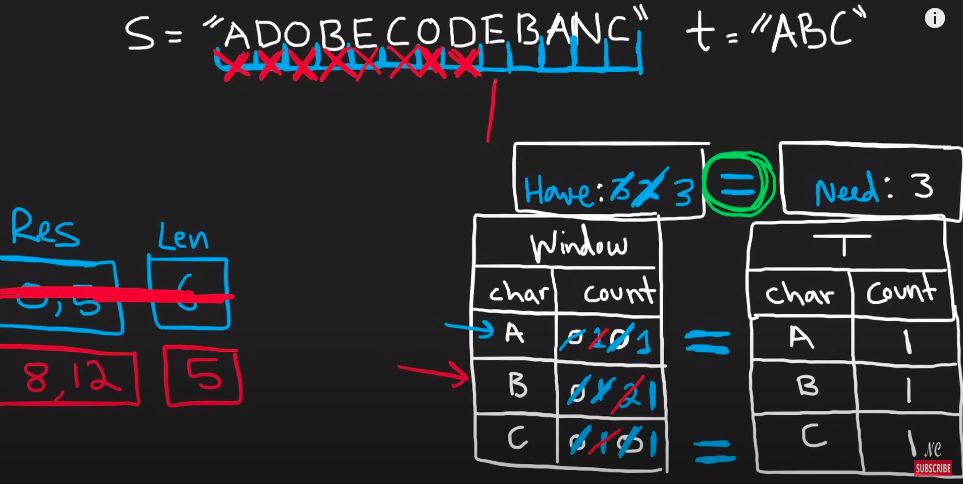

### 239. Sliding Window Maximum (hard)*

You are given an array of integers nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position.

Return the max sliding window.

In [11]:
# attempt
class Solution:
    def maxSlidingWindow(self, nums: list, k: int) -> list:
        
        res = []

        l, r = 0, k

        while r <= len(nums):
            window = nums[l:r]
            res.append(max(window))
            l += 1
            r += 1

        return res
# status = failure
# NOTE: so this seems to be all there is to it... but getting LTE. how to optimize?
# NOTE: in hindsight, it was obvious the answer wasn't going to be this simple for a hard problem

In [12]:
# attempt
class Solution:
    def maxSlidingWindow(self, nums: list, k: int) -> list:
        
        res = []

        l, r = 0, k

        prevMax = None

        while r <= len(nums):
            window = nums[l:r]
            # is there a more efficient way of getting the max of the window
            if not prevMax:
                res.append(max(window))
            else:
                if window[-1] > prevMax:
                    prevMax = window[-1]
                res.append(prevMax)

            l += 1
            r += 1

        return res
    
# status = failure
# NOTE: still too slow. also not sure this would past all test cases anyways...
# NOTE: had a decent intuition with this one but was missing the deque data structure

In [9]:
# solution
class Solution:
    def maxSlidingWindow(self, nums: list, k: int) -> list:
        output = []
        q = collections.deque()  # index
        l = r = 0
        # O(n) O(n)
        while r < len(nums):
            # pop smaller values from q
            while q and nums[q[-1]] < nums[r]:
                q.pop()
            q.append(r)

            # remove left val from window
            if l > q[0]:
                q.popleft()

            if (r + 1) >= k:
                output.append(nums[q[0]])
                l += 1
            r += 1

        return output

#### explanation

my own: this problem makes use of a "monotonic decreasing queue" which is apparently different than the monotonic decreasing stack encountered in problem 739 Daily Temperatures. essentially we can only append from the window values that are smaller than the rightmost value in the queue, and the leftmost value in our queue will always be the greatest value in the window (as we can see in the code, what is appended in the output is always the value at index 0 in the queue). however, if the leftmost number is out of bounds of the window it must be removed from the queue, and if the new value is greater than the right most value, we need to pop from the right until the queue is either empty or until we encounter a value that is greater than the one that was just added. it's important to note we **must actually store indeces in the queue and not the values themselves**, since we will need an index to figure out if a value in the queue is out of bounds or not 

this is how it plays out in the code. start an output array, a queue using collections.deque(), and start both your right and left pointer at 0 (we initially won't move the left pointer until the size of the window reaches length k). now start a while loop that runs while the right pointer is smaller than the length of nums

the inner while loop first encountered deals with the situation where the number at the current iteration is greater than the rightmost ([-1]) value in the queue (we must use the index stored in the queue on nums to find out what the value actually is). as mentioned, continue popping from the end of the queue until it is either empty or until we encounter a value in the queue that is greater than the number at the current iteration (which is at index r). 

then we append to the queue the current index (conceptually, due to the inner while loop we see this means we can only grow the queue by adding smaller numbers, as we see otherwise we have to pop).

then we must check that the leftmost index stored (left most being index 0 in the queue) is still within bounds by checking it is not smaller than the left pointer (it can be greater or equal to left). this looks confusing in code but is easy to visualize

the last if statement deals with once we have a valid window. as mentioned in the beginning, both our left and right pointers start at 0, and so if we have a k=5 for example, we won't have a valid window until r=4 atleast (k appears to be a length, so we must add 1 to r since it is an index). once we have a valid window we can start appending to our output as well as incrementing our left pointer

that last thing we need to do for each iteration of our outer while loop is increment the right pointer by 1

finally, return the output

# 3c. Linked List

### 206. Reverse Linked List (easy)*

Given the head of a singly linked list, reverse the list, and return the reversed list.

note: this felt overwhelming despite being relatively simple. after the leetcode solution & explanation, i decided to go to the basics of linked list instead and it helped a lot. lesson: if something feels overwhelming despite also seeming relatively straightforward, go back to the basics. study before doing the exercise

In [4]:
# attempt
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        pass

# NOTE: have no idea how linkedlist works, have not been able to solve one of these before

In [1]:
# solution -> iterative 
# big O for this solution:
# time complexity: O(n)
# space complexeity: O(1)
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        prev, curr = None, head

        while curr:
            temp = curr.next # this is to store the link to the next node
            curr.next = prev # this is to change the direction of the pointers
            prev = curr # update the position of the "left" pointer
            curr = temp # update the position of the "right" pointer
        return prev # still not entirely sure why prev contains the whole list, but kinda makes sense that head is an entire list because we iterate through it with the while loop

#### explanation

my own: still have a hard time visualizing this linked list in my head... but from what I understand this is how it goes. We actually use two pointers technique for this. if our list is [1,2,3] aka 1 -> 2 -> 3, we want it to be returned as [3,2,1] aka 3 -> 2 -> 1. so the first thing we do is initialize our two pointers, the left one starting at None and the right one at the head (1 in the case of this list [1,2,3]). we are modifying the list in place, which is why the space complexity of this is O(1), and why some of the variable assignment in the while loop is a bit confusing

we then initiate a while loop that will run until curr (initially having the value of head) becomes None, which also reverses the pointers. there are then a couple of variables we need to initiate and we must update our pointers.
* temp will be the next node in the linked list, and is stored temporarily before we break the link. it will be used to update our right pointer
* curr.next will then be equal to prev (this is the "reversing" step and breaks the link). it is None initally because there is nothing before the first node

now we want to shift our pointers
* prev is now equal to the current value curr (moving up the left pointer one). this makes sense since now we have one value in our list, if we're thinking in terms of the first iteration
* now update curr to temp to point to the next node (moving up the right pointer one). we stored the next node in temp, which is why curr now needs to be that value in order to move up our linked list

continue this until the loop end and simply return prev. prev represents the new head and returns the whole reverse linked list. from what i understand, at the end of the linked list, meaning at the last iteration of our while loop, curr will point to None and prev will point to the last node, which is why it stores the entire linked list and becomes the head in the end

visual to help understand

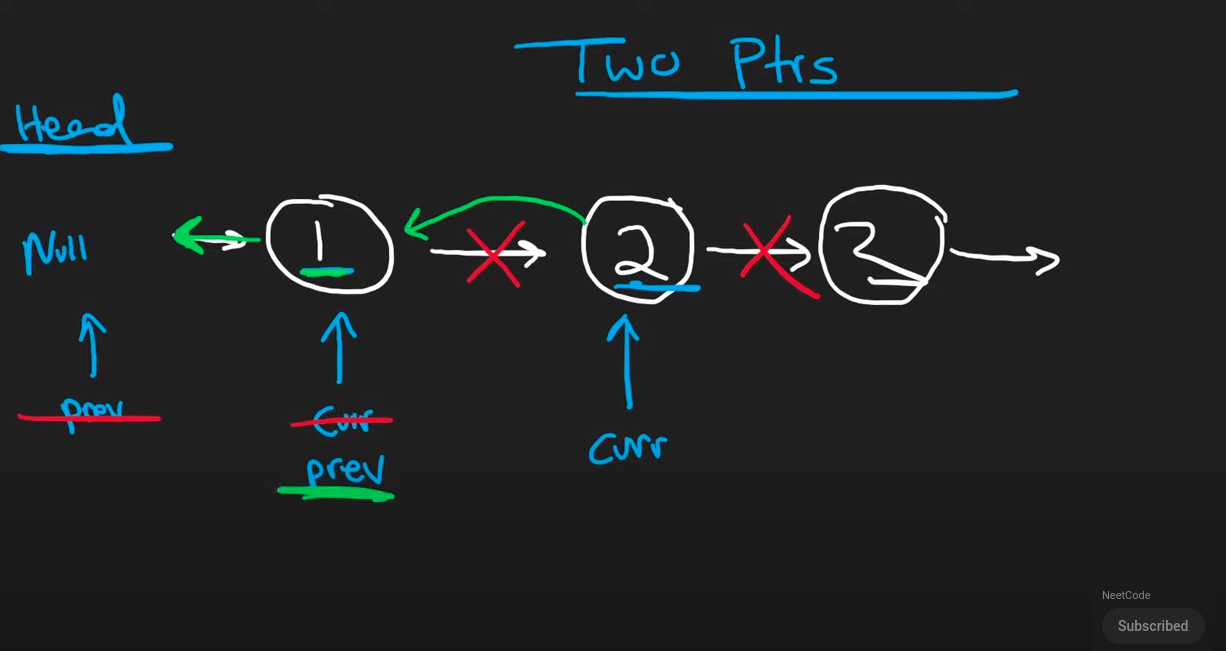

In [15]:
# solution -> recursive
# big O for this solution:
# time complexity: O(n)
# space complexeity: O(n)
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        if not head:
            return None
        
        newHead = head
        if head.next:
            newHead = self.reverseList(head.next)
            head.next.next = head
        head.next = None
        
        return newHead

#### explanation
my own: this is even more complicated to understand and might not be necessary right now since the iterative way is more efficient. maybe come back to it later when more experienced with recursive functions

visual to help understand

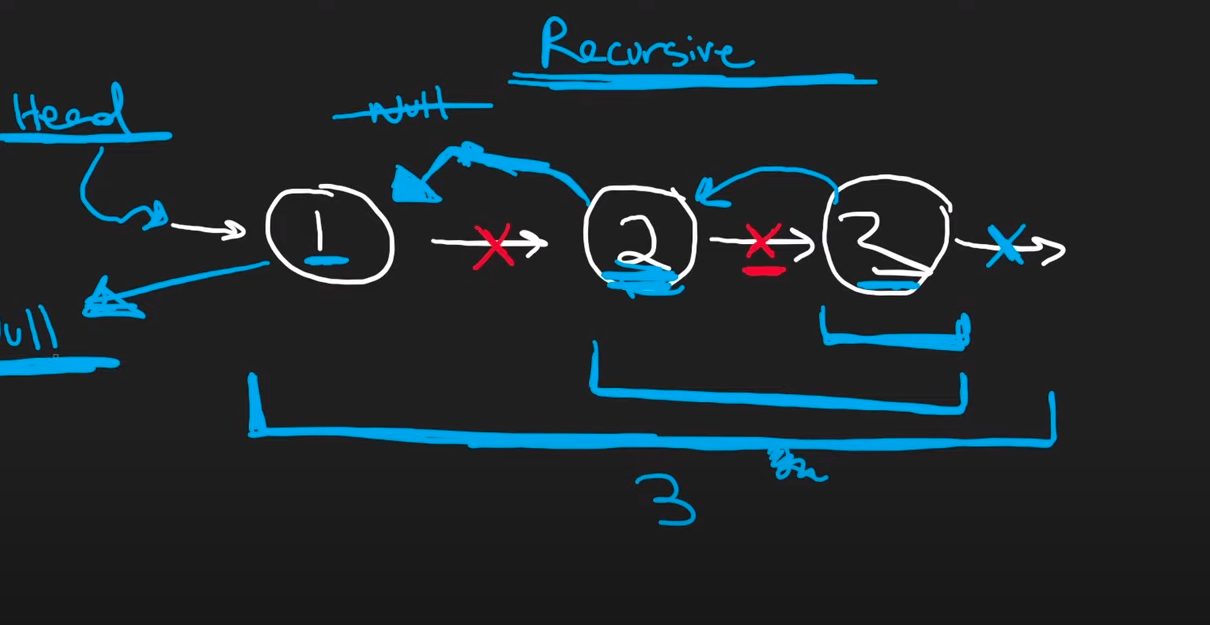

#### linked list basics 

from this video: https://www.youtube.com/watch?v=qp8u-frRAnU&ab_channel=codebasics

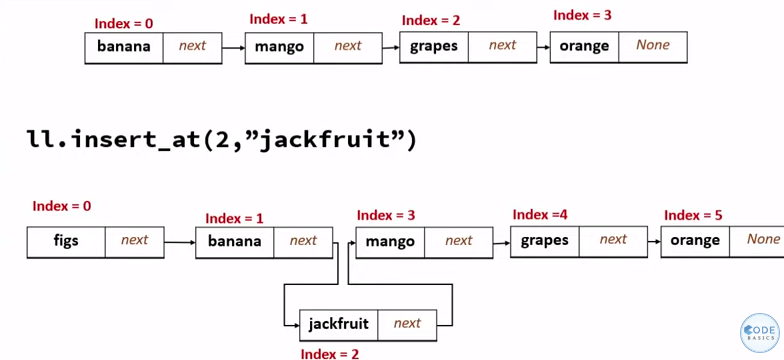

In [5]:
# some practice/study on nodes & linked list
class Node:
    # a simple node. data is the value itself, and next is the reference to the next element
    def __init__(self, data=None, next=None):
        self.data = data
        self.next = next
        
class LinkedList:
    # this appears more similar to the ListNode above. contains a head
    def __init__(self):
        self.head = None
    
    def insert_at_beginning(self, data):
        # this is important. we can see that in this case, next is not None since we insert in the beginning (assuming there is something in this list). the next is the rest of the list
        node = Node(data, self.head)
        self.head = node
        
    def print(self):
        # if no head, then no linked list
        if self.head is None:
            print('Linked list is empty')
            return
        
        # iterating through each item in the linked list
        itr = self.head
        llstr = ''
        while itr:
            llstr += str(itr.data) + '-->'
            itr = itr.next
        print(llstr)
        
    def insert_at_end(self, data):
        # if linked list is empty (head is none), simply create a node. that also becomes the head
        if self.head is None:
            self.head = Node(data, None)
            return
        
        # if linked list is not empty, need to iterate until the end and add a node
        itr = self.head
        # this basically loops until there is no link existing i.e you've reached the end
        while itr.next:
            itr = itr.next
        # once loops end, add the new node
        itr.next = Node(data, None)
        
    def insert_values(self, data_list):
        # allows to insert a list of values
        self.head = None
        for data in data_list:
            self.insert_at_end(data)
            
    def get_length(self):
        # self explanatory
        count = 0
        itr = self.head
        while itr:
            count += 1
            itr = itr.next
        return count
    
    def remove_at(self, index):
        if index<0 or index>=self.get_length():
            raise Exception('invalid index')
            
        # a little unsure why this works in removing element at index 0?
        if index==0:
            self.head = self.head.next
            return
        
        count = 0
        itr = self.head
        while itr:
            # if i understand correctly, removing a link (link being .next), it also removes an element
            if count == index -1:
                itr.next = itr.next.next
                break
            itr = itr.next
            count += 1
            
    def insert_at(self, index, data):
        if index<0 or index>self.get_length():
            raise Exception('Invalid Index')
            
        if index==0:
            self.insert_at_beginning(data)
            return
        
        count = 0
        itr = self.head
        while itr:
            if count == index - 1:
                node = Node(data, itr.next)
                itr.next = node
                break
        
            itr = itr.next
            count += 1

### 21. Merge Two Sorted List (easy)*

You are given the heads of two sorted linked lists list1 and list2.

Merge the two lists into one sorted list. The list should be made by splicing together the nodes of the first two lists.

Return the head of the merged linked list.

In [20]:
# attempt
# no idea how to do this either...
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def mergeTwoLists(self, list1: [ListNode], list2: [ListNode]) -> [ListNode]:
        
        res = dummy = ListNode()
        
        while list1 and list2:
            if list1.val > list2.val:
                res.next = list2.val
            else:
                res.next = list1.val
# status = failure

In [43]:
# solution -> iterative
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def mergeTwoLists(self, list1: ListNode, list2: ListNode) -> ListNode:
        dummy = node = ListNode()

        while list1 and list2:
            if list1.val < list2.val:
                # you need to make the node.next = list1 and not list1.val because you need a node, not a simple integer
                node.next = list1
                # update your pointer for list1
                list1 = list1.next
            else:
                node.next = list2
                # update your pointer for list2
                list2 = list2.next
            # whether you added a node from list1 or list2, you will need to move up in your output linked list
            node = node.next

        # once a list run out, the remainder of your output list will be the list that still has node(s) in it
        node.next = list1 or list2

        return dummy.next

#### explanation

my own: before thinking about this, it's helpful to remember that a node is not just a value: a node contains a value and a pointer. begin by initiating a dummy variable (will be used to return the solution) and a node variable (will be used to update the solution) which are all initially equal to a new ListNode object. 

then begin iterating through list1 and list2 while they have nodes in them. the first if statement checks if the value of list1 is smaller than the value of list2. if that is the case, the next node in your output list will be equal to the node in list1 (note that we want the node and not just the value itself, hence why node.next = list1 and not node.next = list1.val). once that is done, update the list1 pointer by moving on to the next node using list1 = list1.next

if the value in list1 is either equal or greater to the value in list2, then we will want to make the next node in our output list equal to the node in list2, node.next = list2, and also update the pointer for that list using list2 = list2.next

in either cases, we will want to move to the next node in our output list using node = node.next. we continue iterating through both input lists until one of them run out of nodes

once one of the list run out of nodes, we want to grab the remainder of the list that still has nodes in it using node.next = list1 or list2

we return dummy.next since by the definition of our ListNode object, the first node has a dummy node with val=0, but dummy.next contains only nodes from the input lists list1 and list2

In [21]:
# rework
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def mergeTwoLists(self, list1: [ListNode], list2: [ListNode]) -> [ListNode]:
        
        res = ListNode()

        # need a dummy to return the head later
        dummy = res

        while list1 and list2:

            if list1.val <= list2.val:
                dummy.next = list1
                list1 = list1.next
            else:
                dummy.next = list2
                list2 = list2.next

            dummy = dummy.next

        if not list1 and list2:
            dummy.next = list2
        elif not list2 and list1:
            dummy.next = list1

        return res.next

# NOTE: my first attempt was almost correct but missed some key things...
# NOTE: in the if/else blocks in the while loop, i did dummy = list1 instead of dummy.next = list1. is it partly because first node is a dud?
# NOTE: also writing dummy = list1 doesn't seem to add anything to the linked list. unclear on this behaviour. explanation below
# NOTE: would also explain why we do return res.next, since we don't care about the first node. i initally wrote...
#  ... return res (after fixing the while loop) and it was wrong since it had the first node in it (which has a value of 0, as the default show)

asked chatgpt why the following code is incorrect

        while list1 and list2:

            if list1.val <= list2.val:
                dummy = list1
                list1 = list1.next
            else:
                dummy = list2
                list2 = list2.next
                
here's the answer: Your approach to merging two linked lists in Python has a logical flaw that prevents it from working correctly. Specifically, the issue lies in how you try to append nodes to your res linked list. you're not actually linking nodes to your res list; you're just moving the dummy pointer to point to list1 or list2. Consequently, res.next remains None, as you never modify res or dummy.next after the initial assignment dummy = res. A correct way to merge two lists involves adjusting the next pointers of the nodes in your dummy or result list to point to the next node that should follow in the merged list

### 143. Reorder List (medium)*

You are given the head of a singly linked-list. The list can be represented as:

L0 → L1 → … → Ln - 1 → Ln
Reorder the list to be on the following form:

L0 → Ln → L1 → Ln - 1 → L2 → Ln - 2 → …
You may not modify the values in the list's nodes. Only nodes themselves may be changed.

In [44]:
# attempt
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def reorderList(self, head: [ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        
        list_length = 0
        for i in head:
            list_length += 1

        dummy = head
        location = 0
        for i in head:
            if location % 2 == 0:
                # look for "left" node in the original list
                pass
            if location % 2 == 1:
                # look for the "right" node in the original list
                pass
            location += 1

# status = failure, couldn't figure out how to modify in place and keep track of the location

In [13]:
# solution
# big O for this solution
# time complexity: O(n)
# space complexity: O(1) - this is done in O(1) memory, making it better but tricker. what's a simplier albeit more expensive solution?
class Solution:
    def reorderList(self, head: ListNode) -> None:
        # find middle
        slow, fast = head, head.next
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

        # reverse second half
        second = slow.next
        prev = slow.next = None
        while second:
            tmp = second.next
            second.next = prev
            prev = second
            second = tmp

        # merge two halfs
        first, second = head, prev
        while second:
            tmp1, tmp2 = first.next, second.next
            first.next = second
            second.next = tmp1
            first, second = tmp1, tmp2

#### explanation
my own: this problem makes use of problem 206 and 21. the idea is to find the middle of our singly-linked list essentianlly spliting it in half using a slow and a fast pointer (new), then reversing the second half (problem 206) then merging the first and the now reversed second half (problem 21).

the first part of the algorithm consists of splitting the list in half by having a slow and a fast pointer. your slow pointer starts at the head (the beginning) and will move up by one, and your fast pointer starts at one node after the head (head.next) and will move up by two. you continue this until fast reaches the end of the linked list

once that is complete we need to reverse the second half. since slow ended before the second half, slow.next will represent the start of the second half which is why we assign second to slow.next. prev will now be equal to None since by reversing the list there will be nothing before the first node, and second.next will also be equal to None because when we merge the lists later on, we will want the end of the first half to point to null. after the assignment of the second and prev variable, the reversal of the second list is exactly the same as in probem 206 

lastly we need to merge the two list. first is assigned to head because we want to start at the beginning, and second is assigned to prev as prev now represents the head of the reversed second half. 

we loop using "second" as it could potentially be smaller than the first half if we originally have an odd number of nodes. the merging part of this algorithm is easy to visualize; however the code is a bit tricky. store the next values for both first and second in temp variables. since we want to keep the first node where it is, we assign first.next to second, which will be the last node of the original linked list in the first iteration. so far we have L0 -> Ln. second.next will then be set tmp1, which we stored earlier and is equal L1. this is the "alternating step", as we can see now we have L0 -> Ln - L1. lastly, we shift our pointers so we will be able to get the .next values in the next iteration, and we do so by setting first and second to the stored next values from earlier - this is where we see why we initially had to store them at the beginning of the iteration, as before shifting the pointers we assign new values to first.next and second.next so we cannot reuse them to move forward.

(so for example, on the first iteration, first = L0, second = Ln, tmp1 = L1 tmp2 = Ln-1)

In [16]:
# rework -> try a rework with an array? uses extra memory but would be good practice to see if i really understand concepts
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def reorderList(self, head: [ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        # this problem has 3 steps...

        # 1. find the middle
        # slow starts at first node, fast starts at the second
        slow, fast = head, head.next

        # only care to see that fast and fast.next is not null, since slow will be behind
        # when fast reaches the end of the linked list, slow will represent the end of first half, therefor slow.next is beginning of second half
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

        # 2. reverse second half
        # as mentioned, the next node in slow will be the halfway point
        second_half = slow.next
        # same as in reversing linked list problem 
        # prev has to be None because should be nothing before the first node in the reversed linked list
        # slow.next also has to be None because we don't want the end of the first linked list to point to the begining of the second
        prev = slow.next = None 

        while second_half:
            temp = second_half.next # store next node
            second_half.next = prev # reverse direction
            prev = second_half # update left pointer
            second_half = temp # update right pointer


        # 3 merge the two halfs
        first, second_half = head, prev
        # you want to loop using second_half since it could be potentially shorter than the first half if we have an odd number of nodes originally
        while second_half:
            temp1, temp2 = first.next, second_half.next # storing next nodes

            # changing the links, alternating values between first and second_half
            first.next = second_half
            second_half.next = temp1

            first, second_half = temp1, temp2 # shifting pointers

### 19. Remove Nth Node From End of List (medium)

Given the head of a linked list, remove the nth node from the end of the list and return its head.

In [17]:
# attempt

In [18]:
# solution